In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    { "figure.figsize": (6, 4) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_formats = set(('retina', 'svg'))
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load the data
cvd = pd.read_csv('C:/Users\Dell/Desktop/MSC PROJECT/PROJECT OUTLINE/cvd.csv')
cvd.head(5)

patient_id gender  age  body_mass_index  smoker  systolic_blood_pressure  \
0  PT00085957      F   54             25.0       0                    161.0   
1  PT00093111      M   31              NaN       0                    121.0   
2  PT00058456      M   50             31.3       0                    130.0   
3  PT00016352      M   61             30.0       0                    165.0   
4  PT00060611      F   67             32.6       0                    166.0   

   hypertension_treated  family_history_of_cardiovascular_disease  \
0                     0                                         1   
1                     0                                         0   
2                     0                                         0   
3                     0                                         0   
4                     0                                         0   

   atrial_fibrillation  chronic_kidney_disease  rheumatoid_arthritis  \
0                    0                       0                     0   
1                    0                       0                     0   
2                    0                       0                     0   
3                    0                       0                     0   
4                    0                       0                     0   

   diabetes  chronic_obstructive_pulmonary_disorder  \
0         0                                       0   
1         0                                       0   
2         0                                       0   
3         0                                       0   
4         0                                       0   

   forced_expiratory_volume_1  time_to_event_or_censoring  \
0                         NaN                          10   
1                         NaN                          10   
2                   91.027306                          10   
3                         NaN                           6   
4                         NaN                          10   

   heart_attack_or_stroke_occurred  
0                                0  
1                                0  
2                                0  
3                                1  
4                                0

In [3]:
#check data info
cvd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   patient_id                                100000 non-null  object 
 1   gender                                    100000 non-null  object 
 2   age                                       100000 non-null  int64  
 3   body_mass_index                           70115 non-null   float64
 4   smoker                                    100000 non-null  int64  
 5   systolic_blood_pressure                   90133 non-null   float64
 6   hypertension_treated                      100000 non-null  int64  
 7   family_history_of_cardiovascular_disease  100000 non-null  int64  
 8   atrial_fibrillation                       100000 non-null  int64  
 9   chronic_kidney_disease                    100000 non-null  int64  
 10  rheumatoid_arthritis 

In [4]:
#check for duplicates

duplicate_rows = cvd[cvd.duplicated()]

if duplicate_rows.empty:
    print("No duplicate rows found.")
else:
    print("Duplicate rows found:")
    print(duplicate_rows)


No duplicate rows found.


In [5]:
#check data distribution
cvd.describe().round(2)

age  body_mass_index     smoker  systolic_blood_pressure  \
count  100000.00         70115.00  100000.00                 90133.00   
mean       46.89            26.98       0.09                   129.92   
std        16.96             4.50       0.28                    17.70   
min        18.00             6.00       0.00                    50.00   
25%        32.00            24.10       0.00                   118.00   
50%        47.00            27.10       0.00                   130.00   
75%        61.00            30.00       0.00                   142.00   
max        79.00            46.60       1.00                   212.00   

       hypertension_treated  family_history_of_cardiovascular_disease  \
count             100000.00                                 100000.00   
mean                   0.12                                      0.17   
std                    0.33                                      0.37   
min                    0.00                                      0.00   
25%                    0.00                                      0.00   
50%                    0.00                                      0.00   
75%                    0.00                                      0.00   
max                    1.00                                      1.00   

       atrial_fibrillation  chronic_kidney_disease  rheumatoid_arthritis  \
count            100000.00               100000.00             100000.00   
mean                  0.01                    0.11                  0.01   
std                   0.10                    0.31                  0.10   
min                   0.00                    0.00                  0.00   
25%                   0.00                    0.00                  0.00   
50%                   0.00                    0.00                  0.00   
75%                   0.00                    0.00                  0.00   
max                   1.00                    1.00                  1.00   

        diabetes  chronic_obstructive_pulmonary_disorder  \
count  100000.00                               100000.00   
mean        0.09                                    0.08   
std         0.29                                    0.27   
min         0.00                                    0.00   
25%         0.00                                    0.00   
50%         0.00                                    0.00   
75%         0.00                                    0.00   
max         1.00                                    1.00   

       forced_expiratory_volume_1  time_to_event_or_censoring  \
count                    30675.00                   100000.00   
mean                        87.83                        9.68   
std                         15.86                        1.41   
min                         20.02                        1.00   
25%                         81.98                       10.00   
50%                         93.36                       10.00   
75%                         96.70                       10.00   
max                        100.00                       10.00   

       heart_attack_or_stroke_occurred  
count                        100000.00  
mean                              0.07  
std                               0.25  
min                               0.00  
25%                               0.00  
50%                               0.00  
75%                               0.00  
max                               1.00

In [6]:
#let's drop the forced_expiratory_volume_1 as it has too many missing values and patient_id as it has no predictive value.

# List of features to remove
features_to_remove = ['forced_expiratory_volume_1', 'patient_id']

# Remove the specified features from the DataFrame
cvd = cvd.drop(features_to_remove, axis=1)
cvd.head(3)

gender  age  body_mass_index  smoker  systolic_blood_pressure  \
0      F   54             25.0       0                    161.0   
1      M   31              NaN       0                    121.0   
2      M   50             31.3       0                    130.0   

   hypertension_treated  family_history_of_cardiovascular_disease  \
0                     0                                         1   
1                     0                                         0   
2                     0                                         0   

   atrial_fibrillation  chronic_kidney_disease  rheumatoid_arthritis  \
0                    0                       0                     0   
1                    0                       0                     0   
2                    0                       0                     0   

   diabetes  chronic_obstructive_pulmonary_disorder  \
0         0                                       0   
1         0                                       0   
2         0                                       0   

   time_to_event_or_censoring  heart_attack_or_stroke_occurred  
0                          10                                0  
1                          10                                0  
2                          10                                0

In [7]:
cvd.columns

Index(['gender', 'age', 'body_mass_index', 'smoker', 'systolic_blood_pressure',
       'hypertension_treated', 'family_history_of_cardiovascular_disease',
       'atrial_fibrillation', 'chronic_kidney_disease', 'rheumatoid_arthritis',
       'diabetes', 'chronic_obstructive_pulmonary_disorder',
       'time_to_event_or_censoring', 'heart_attack_or_stroke_occurred'],
      dtype='object')

In [8]:
# Renaming the columns to five-character abbreviations
cvd.rename(columns={
    'gender': 'GENDER',
    'age': 'AGE',
    'body_mass_index': 'BMI',
    'smoker': 'SMOKER',
    'systolic_blood_pressure': 'SYSBP',
    'hypertension_treated': 'PREVHYP',
    'family_history_of_cardiovascular_disease': 'FAMILY_HISTORY',
    'atrial_fibrillation': 'ATR_FIB',
    'chronic_kidney_disease': 'KIDNEY_DISEASE',
    'rheumatoid_arthritis': 'ATHRITIS',
    'diabetes': 'DIABETES',
    'chronic_obstructive_pulmonary_disorder': 'COPD',
    'time_to_event_or_censoring': 'TIME',
    'heart_attack_or_stroke_occurred': 'CVD'
}, inplace=True)

cvd.head(3)

GENDER  AGE   BMI  SMOKER  SYSBP  PREVHYP  FAMILY_HISTORY  ATR_FIB  \
0      F   54  25.0       0  161.0        0               1        0   
1      M   31   NaN       0  121.0        0               0        0   
2      M   50  31.3       0  130.0        0               0        0   

   KIDNEY_DISEASE  ATHRITIS  DIABETES  COPD  TIME  CVD  
0               0         0         0     0    10    0  
1               0         0         0     0    10    0  
2               0         0         0     0    10    0

In [9]:
#Lets check for missing values and the percentage in relation to the data
missing_values_count = pd.DataFrame({'Missing Values':cvd.isna().sum()})
total = len(cvd)
percentage_missing_values = round((missing_values_count['Missing Values']/total)*100,1)
missing_values_count['Percentage'] = percentage_missing_values
missing_values_count.sort_values(by='Missing Values',ascending = False)

Missing Values  Percentage
BMI                      29885        29.9
SYSBP                     9867         9.9
GENDER                       0         0.0
AGE                          0         0.0
SMOKER                       0         0.0
PREVHYP                      0         0.0
FAMILY_HISTORY               0         0.0
ATR_FIB                      0         0.0
KIDNEY_DISEASE               0         0.0
ATHRITIS                     0         0.0
DIABETES                     0         0.0
COPD                         0         0.0
TIME                         0         0.0
CVD                          0         0.0

In [10]:
#filling missing values using ffill

# Apply forward fill to the specified columns
cvd[['BMI', 'SYSBP']] = cvd[['BMI', 'SYSBP']].ffill()

# Verify that the missing values have been filled
print(cvd[['BMI', 'SYSBP']].isnull().sum())


BMI      0
SYSBP    0
dtype: int64


In [11]:
# Convert 'SEX' to numeric values
cvd['GENDER'] = cvd['GENDER'].map({'M': 1, 'F': 0})

# Check if the conversion is successful
print(cvd['GENDER'].head())


0    0
1    1
2    1
3    1
4    0
Name: GENDER, dtype: int64


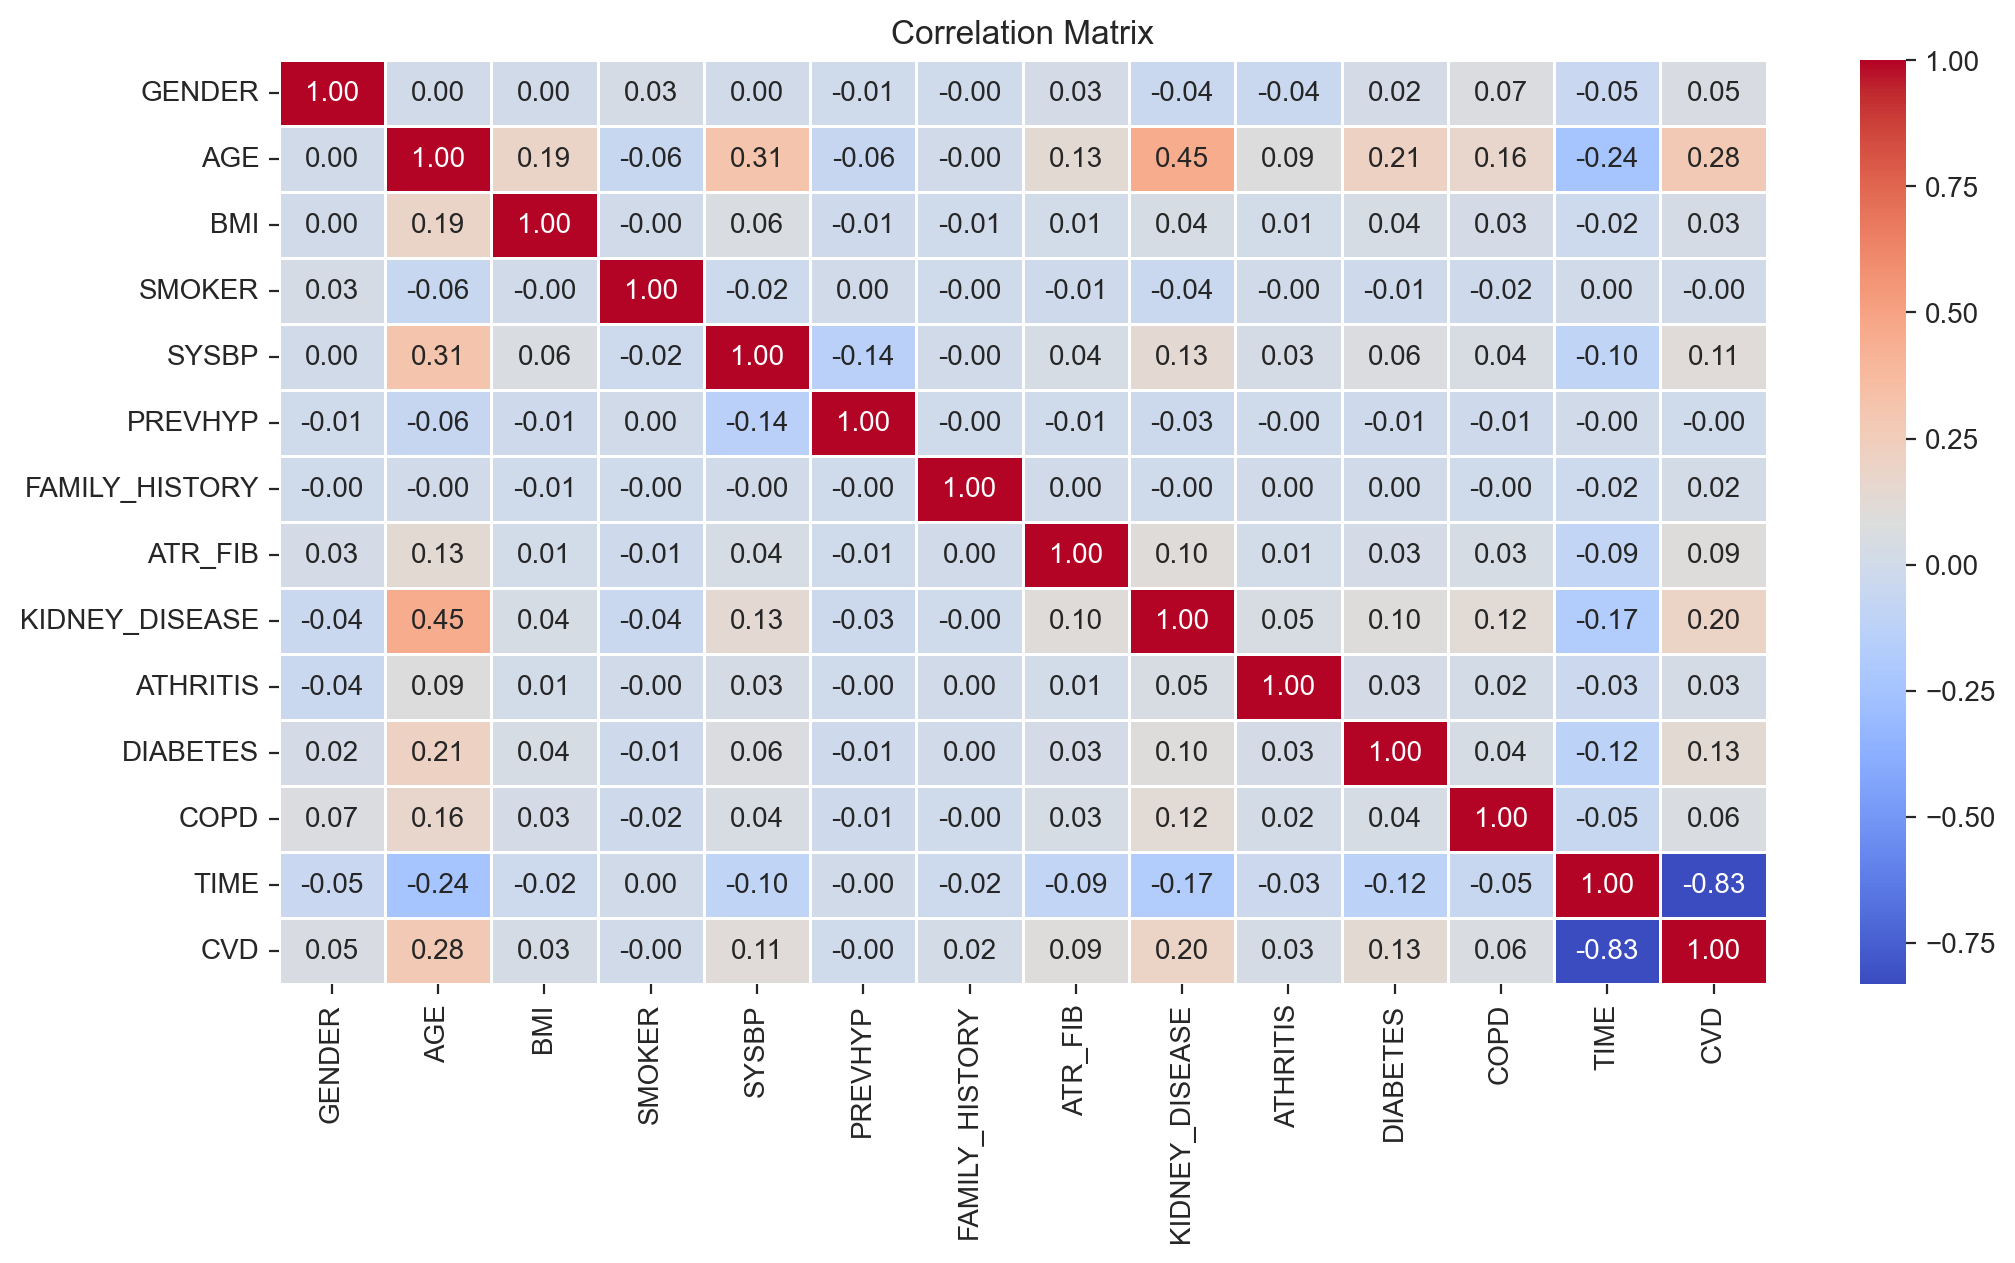

In [17]:
#Firstly, lets plot the correlation matrix to see features that are correlated

correlation_matrix = cvd.corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


### Observations:
- Age and CKD: There is a moderately positive correlation (0.45), indicating that as age increases, CKD (Chronic Kidney Disease) tends to be more prevalent.
- Age and CHD: There is a positive correlation (0.28), suggesting that CHD (Coronary Heart Disease) is more likely as age increases.
- SBP and Age: SBP (Systolic Blood Pressure) has a positive correlation with age (0.31), implying that blood pressure tends to increase with age.
- Most other correlations are weak, close to zero, indicating little or no linear relationship between those pairs of variables.

In [19]:
#descriptive statistics
cvd[['AGE', 'BMI', 'SYSBP']].describe()


AGE            BMI          SYSBP
count  100000.00000  100000.000000  100000.000000
mean       46.89020      26.987836     129.915190
std        16.96093       4.505503      17.700571
min        18.00000       6.000000      50.000000
25%        32.00000      24.100000     118.000000
50%        47.00000      27.200000     130.000000
75%        61.00000      30.000000     142.000000
max        79.00000      46.600000     212.000000

### **Observations:**

#### **Age:**

- The dataset includes a wide age range of adult individuals, from 18 to 79 years.
- The average age is approximately 47 years, suggesting that the dataset primarily represents middle-aged individuals.
- The age distribution is relatively even, with the middle 50% of the population (between the 25th and 75th percentiles) ranging from 32 to 61 years.
- There is a moderate spread in the age data, as indicated by the standard deviation of 16.96 years.

#### **BMI (Body Mass Index):**

- The average BMI is approximately 27, placing the average individual in the dataset within the "overweight" category (BMI of 25-29.9).
- The BMI values range from an extremely low value of 6.0 to a high of 46.6, indicating a broad range of body weights, from potentially underweight individuals to those in the obese category.
- The middle 50% of the population has a BMI between 24.1 and 30.0, suggesting that a significant portion of the dataset falls within the normal to overweight range.
- The minimum BMI value of 6.0 is an extreme outlier and might indicate a data entry error or an exceptionally rare case.

#### **SBP (Systolic Blood Pressure):**

- The average systolic blood pressure is approximately 130 mmHg, which is just on the threshold for Stage 1 Hypertension.
- Systolic blood pressure values range from a very low 50 mmHg to a high 212 mmHg, indicating a wide variability in blood pressure among the individuals in the dataset.
- The middle 50% of the population has an SBP between 118 mmHg and 142 mmHg, suggesting a significant proportion of individuals might have elevated blood pressure or hypertension.
- The minimum SBP value of 50 mmHg is unusually low and could be an outlier or indicate a measurement error.


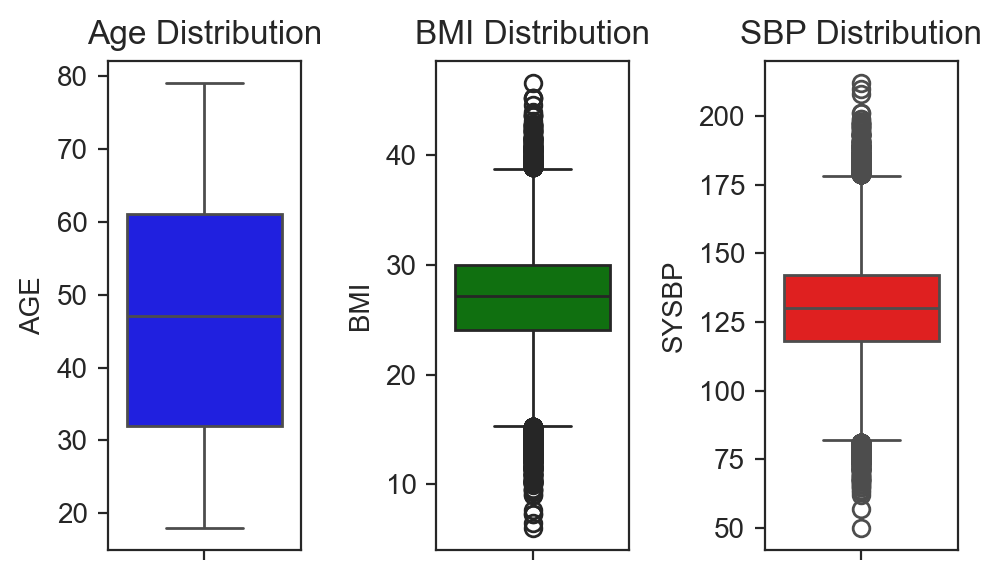

In [22]:
#Checking the outliers using boxplot
# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(5, 3))

# Box plot for Age
sns.boxplot(y=cvd['AGE'], ax=axes[0], color='blue')
axes[0].set_title('Age Distribution')

# Box plot for BMI
sns.boxplot(y=cvd['BMI'], ax=axes[1], color='green')
axes[1].set_title('BMI Distribution')

# Box plot for SBP
sns.boxplot(y=cvd['SYSBP'], ax=axes[2], color='red')
axes[2].set_title('SBP Distribution')

# Show the plot
plt.tight_layout()
plt.show()


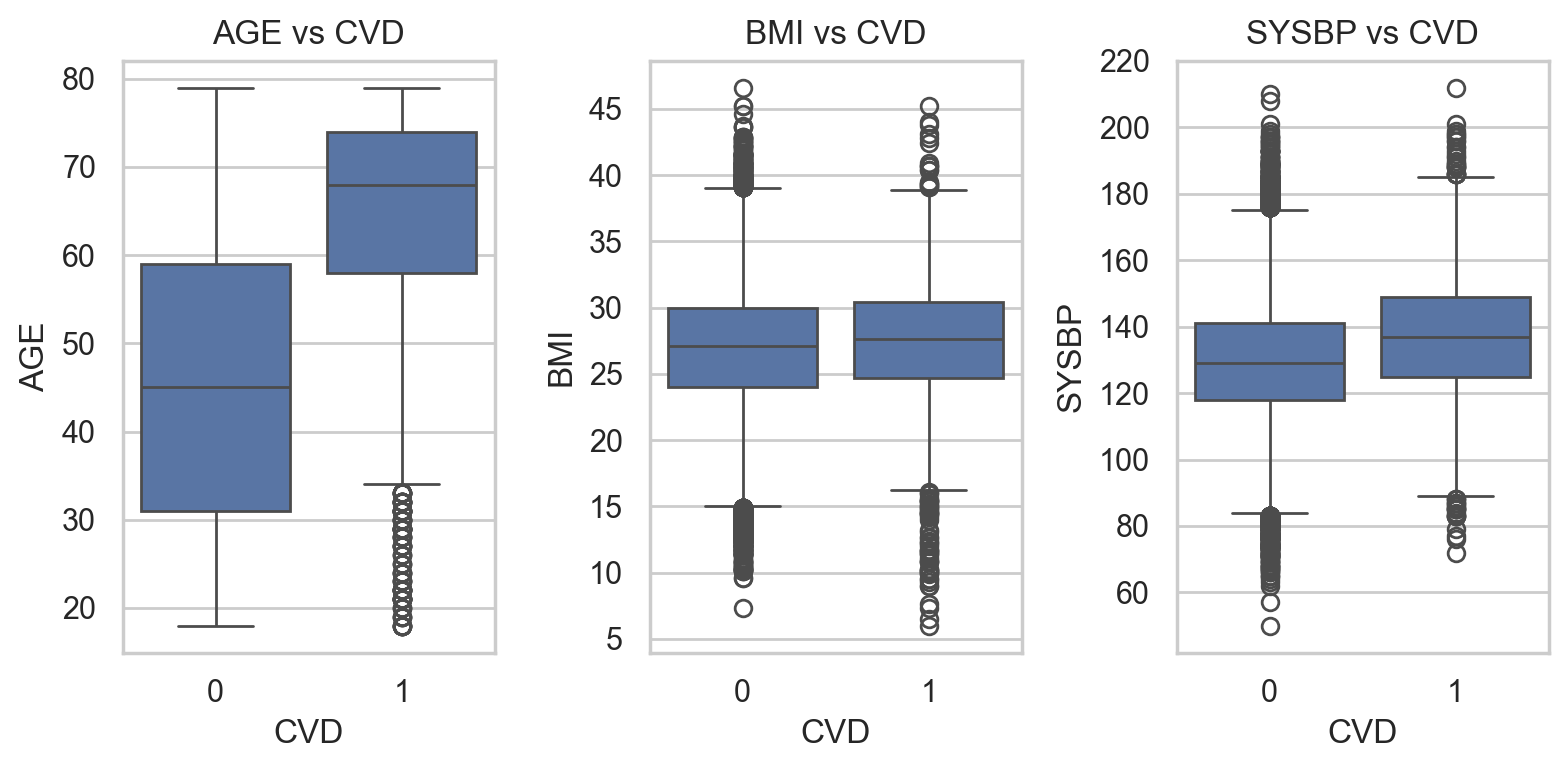

In [155]:

plt.figure(figsize=(8, 4))
features = ['AGE', 'BMI', 'SYSBP']

for i, feature in enumerate(features, 1):
    plt.subplot(1, 3, i)  # 1x3 grid for 3 plots
    sns.boxplot(x='CVD', y=feature, data=cvd)
    plt.title(f'{feature} vs CVD')
    
plt.tight_layout()
plt.show()


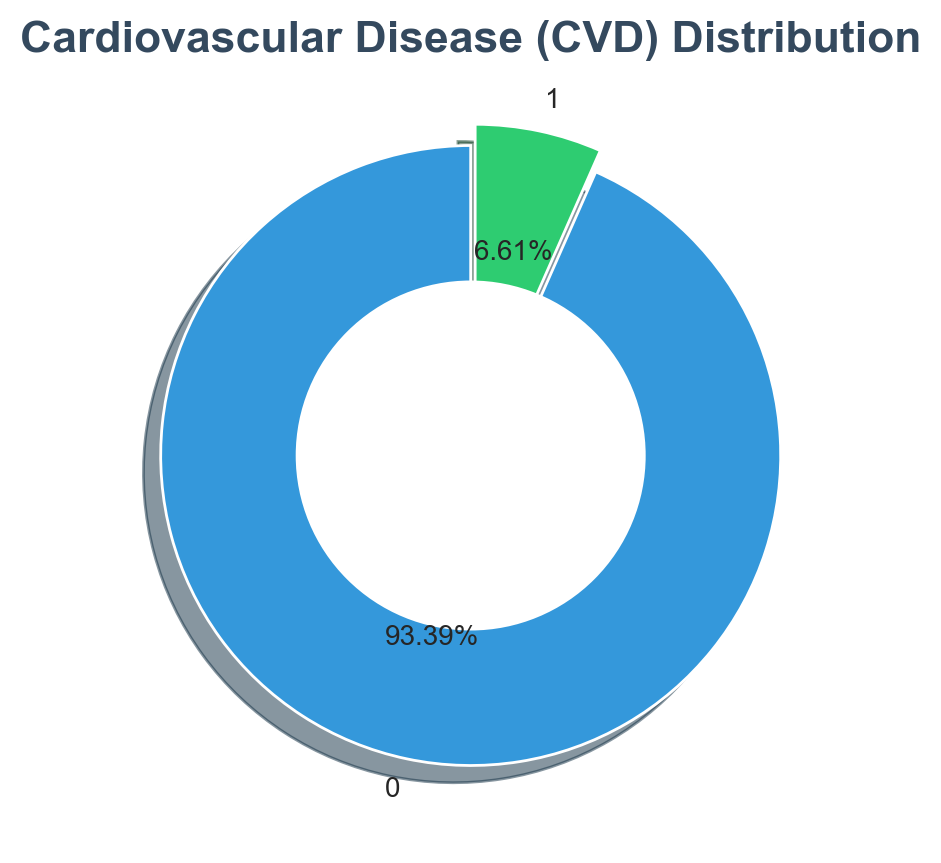

In [27]:
#Check the distribution of CVD 

# Count the occurrences of CVD
cvd_distribution = cvd['CVD'].value_counts()

# Define custom colors
colors = ['#3498db', '#2ecc71']

# Plot the pie chart
plt.figure(figsize=(5, 6))
plt.pie(cvd_distribution, labels=cvd_distribution.index, autopct='%1.2f%%', explode=[0, 0.07], shadow=True, colors=colors, startangle=90)
my_circle = plt.Circle((0, 0), 0.56, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Cardiovascular Disease (CVD) Distribution', fontweight='bold', color='#34495e', fontsize=16)
plt.show()



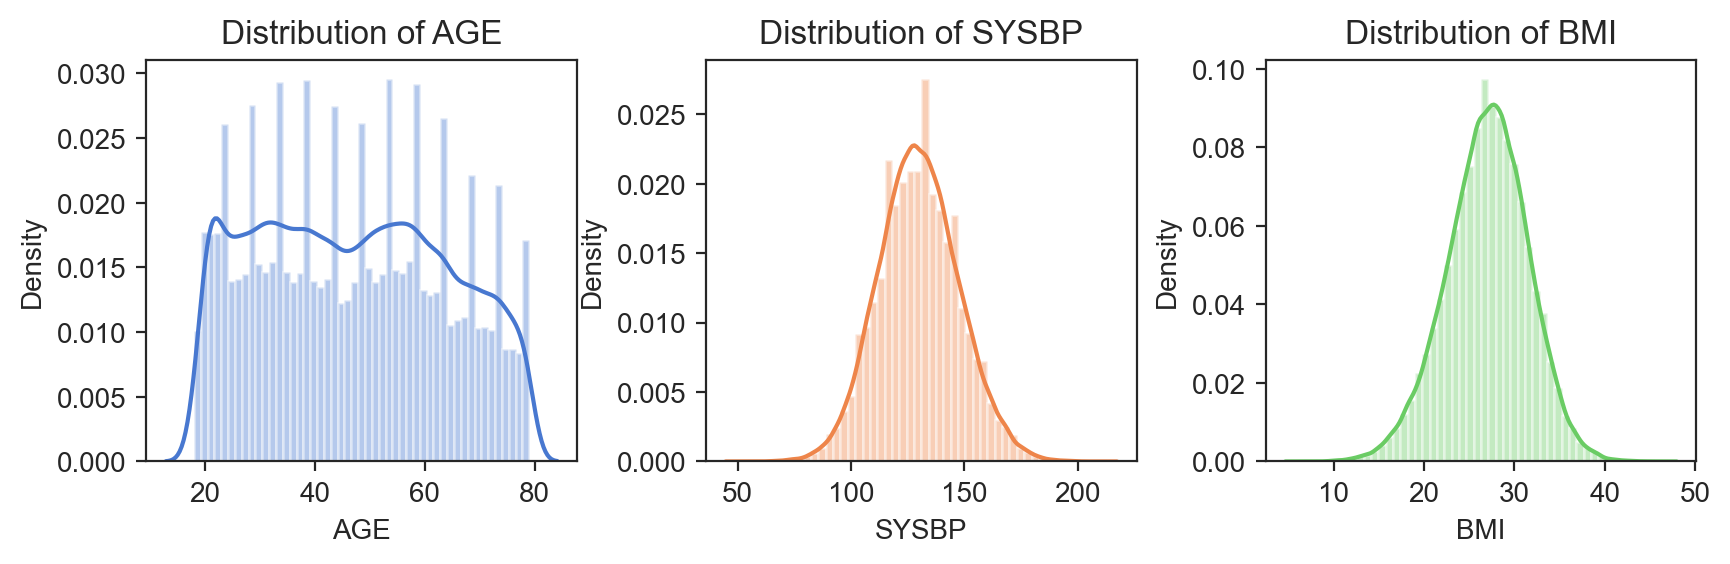

In [29]:
#Distribution of continous variables

# Create a figure with a 2x3 grid of subplots
plt.figure(figsize=(10, 6))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Plot distributions for continuous variables
variables = ['AGE', 'SYSBP', 'BMI']
colors = sns.color_palette("muted", len(variables))  # Use a color palette from seaborn

for i, (var, color) in enumerate(zip(variables, colors)):
    plt.subplot(2, 3, i + 1)
    sns.distplot(cvd[var], color=color)
    plt.title(f'Distribution of {var}')

# Display the figure with all distributions
plt.show()


### **Observations:**

#### **1. Distribution of Age:**
- **Shape:** The distribution of age appears fairly uniform between the ages of 20 and 70, with slight peaks and troughs. The distribution is fairly flat, indicating that the dataset contains a wide and relatively even spread of individuals across this age range.
- **Range:** The age ranges from about 18 to just below 80 years.
- **Observations:** The near-uniform distribution suggests that the dataset might have been designed to include a balanced representation of various age groups, particularly between 20 and 70 years. The slight decline in density after 70 indicates fewer older individuals.

#### **2. Distribution of SBP (Systolic Blood Pressure):**
- **Shape:** The distribution of SBP is right-skewed, with a higher density around 110 to 140 mmHg and a tail extending towards higher values.
- **Range:** The SBP ranges from about 50 mmHg to just over 200 mmHg.
- **Observations:** Most individuals in the dataset have SBP in the range of 110 to 140 mmHg, which includes normal and elevated blood pressure. The long tail towards higher values indicates that there are individuals with significantly high blood pressure (indicative of hypertension). The right skewness suggests that elevated blood pressure is more common in this dataset.

#### **3. Distribution of BMI (Body Mass Index):**
- **Shape:** The distribution of BMI is approximately normal, with a peak around the 25-30 range, tapering off symmetrically on both sides.
- **Range:** The BMI values range from about 10 to nearly 50.
- **Observations:** The peak of the distribution indicates that most individuals have a BMI in the "overweight" category (25-29.9). The normal-like shape suggests a typical distribution of body mass index values, with fewer individuals at the extremes (underweight and obese). The small tail towards low BMI values and the wider tail towards high BMI values are also notable.



In [22]:
cvd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   gender     100000 non-null  object 
 1   age        100000 non-null  int64  
 2   bmi        100000 non-null  float64
 3   smoker     100000 non-null  int64  
 4   sbp        100000 non-null  float64
 5   hyptr      100000 non-null  int64  
 6   fhcvd      100000 non-null  int64  
 7   atrfib     100000 non-null  int64  
 8   ckd        100000 non-null  int64  
 9   arthritis  100000 non-null  int64  
 10  diabetes   100000 non-null  int64  
 11  copd       100000 non-null  int64  
 12  chd        100000 non-null  int64  
dtypes: float64(2), int64(10), object(1)
memory usage: 9.9+ MB


In [19]:
cvd.head()

gender  age   bmi  smoker    sbp  hyptr  fhcvd  atrfib  ckd  arthritis  \
0       0   54  25.0       0  161.0      0      1       0    0          0   
1       1   31  25.0       0  121.0      0      0       0    0          0   
2       1   50  31.3       0  130.0      0      0       0    0          0   
3       1   61  30.0       0  165.0      0      0       0    0          0   
4       0   67  32.6       0  166.0      0      0       0    0          0   

   diabetes  copd  time  chd  
0         0     0    10    0  
1         0     0    10    0  
2         0     0    10    0  
3         0     0     6    1  
4         0     0    10    0

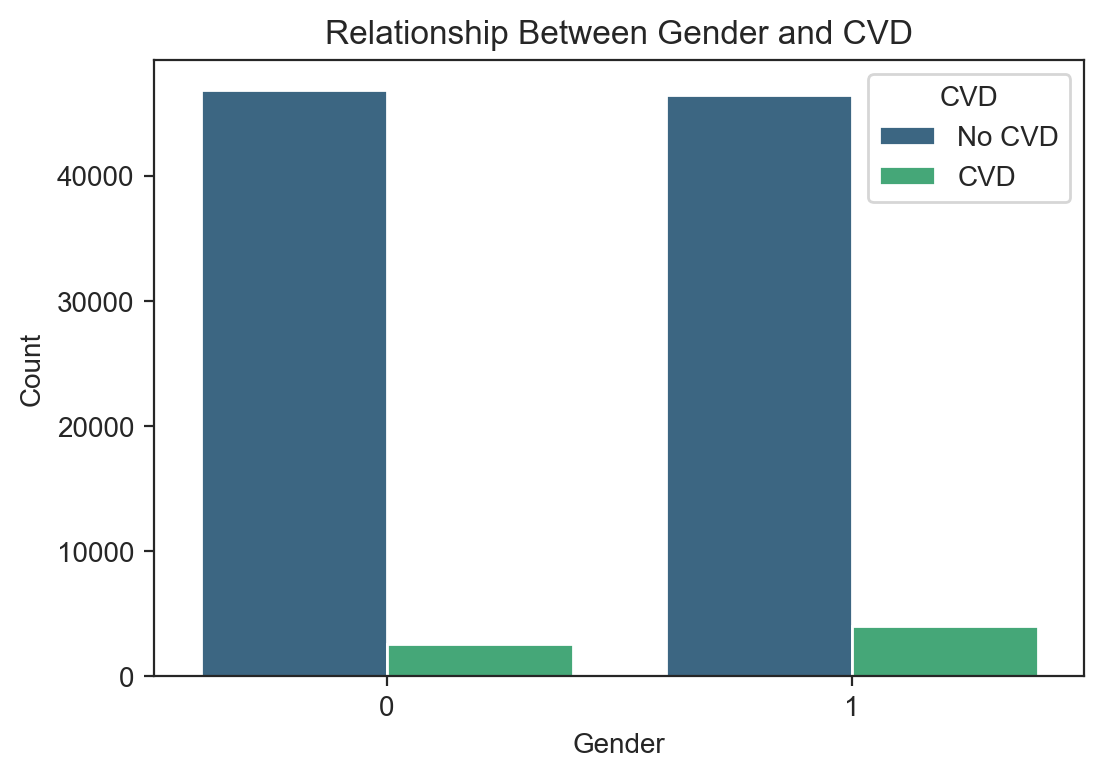

In [31]:

# Plotting
plt.figure(figsize=(6, 4))

# Create a count plot
sns.countplot(data=cvd, x='GENDER', hue='CVD', palette='viridis')

# Add titles and labels
plt.title('Relationship Between Gender and CVD')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='CVD', loc='upper right', labels=['No CVD', 'CVD'])

# Show plot
plt.show()


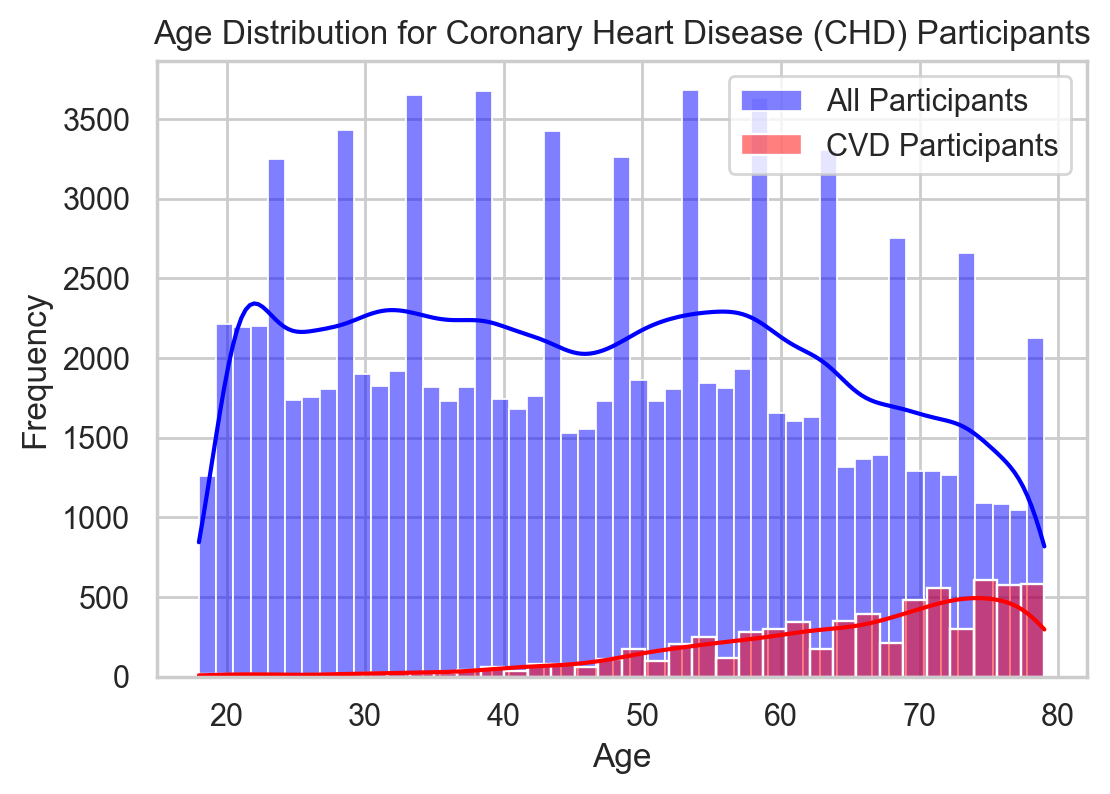

In [129]:
#Age Distribution of CHD

# Filter data for individuals with CVD (CVD = 1)
chd_data = cvd[cvd['CVD'] == 1]

# Plotting age distribution for individuals with and without CHD
plt.figure(figsize=(6, 4))
sns.histplot(cvd['AGE'], kde=True, label='All Participants', color='blue')
sns.histplot(chd_data['AGE'], kde=True, label='CVD Participants', color='red')
plt.title('Age Distribution for Coronary Heart Disease (CHD) Participants')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()


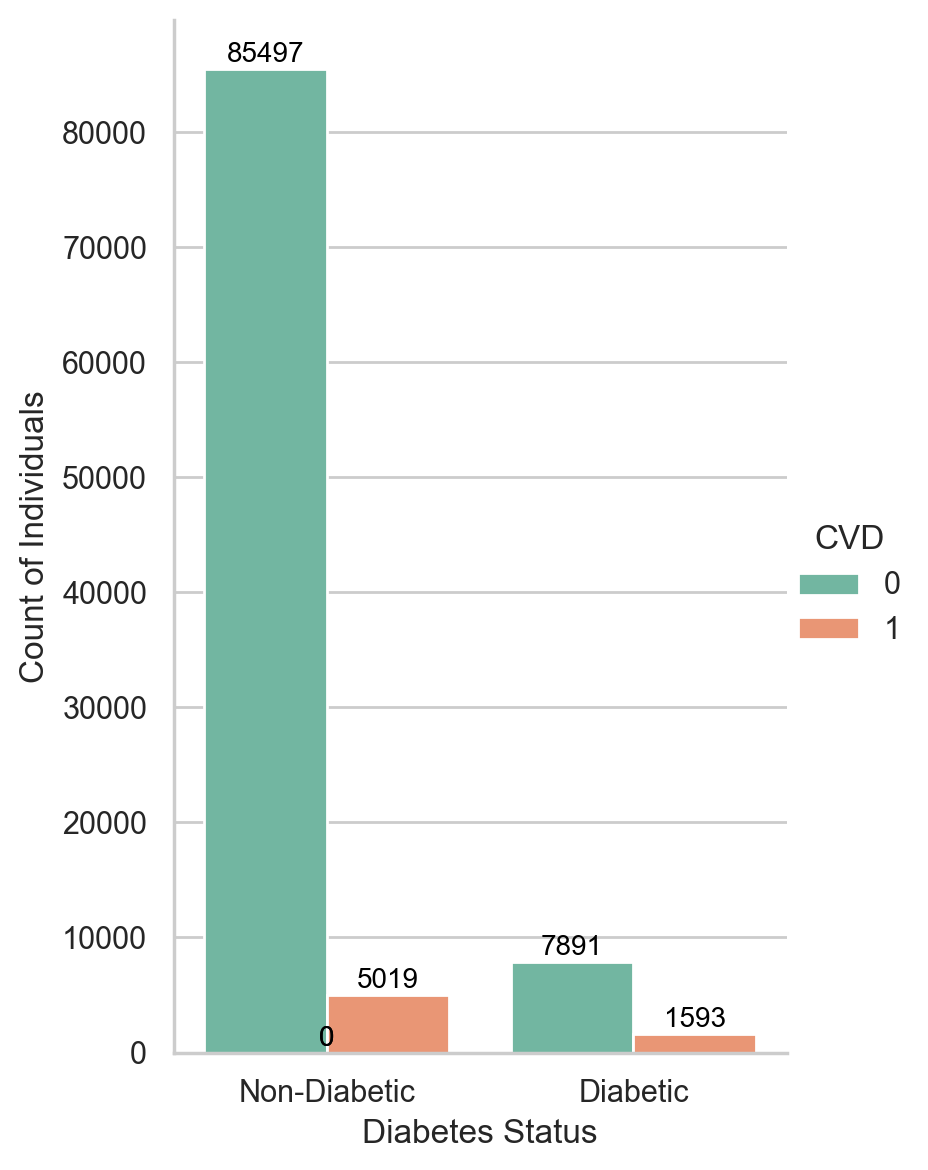

In [35]:
sns.set(style="whitegrid")
# Create a grouped bar plot
ax = sns.catplot(x='DIABETES', hue='CVD', kind='count', data=cvd, palette='Set2', height=6, aspect=.7)
ax.set_axis_labels("Diabetes Status", "Count of Individuals")
ax.set_titles("Count of CVD Cases by Diabetes Status")
ax.set_xticklabels(['Non-Diabetic', 'Diabetic'])

# Add the counts on top of the bars
for p in ax.ax.patches:
    ax.ax.annotate(f'{int(p.get_height())}', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                   textcoords='offset points')

plt.show()


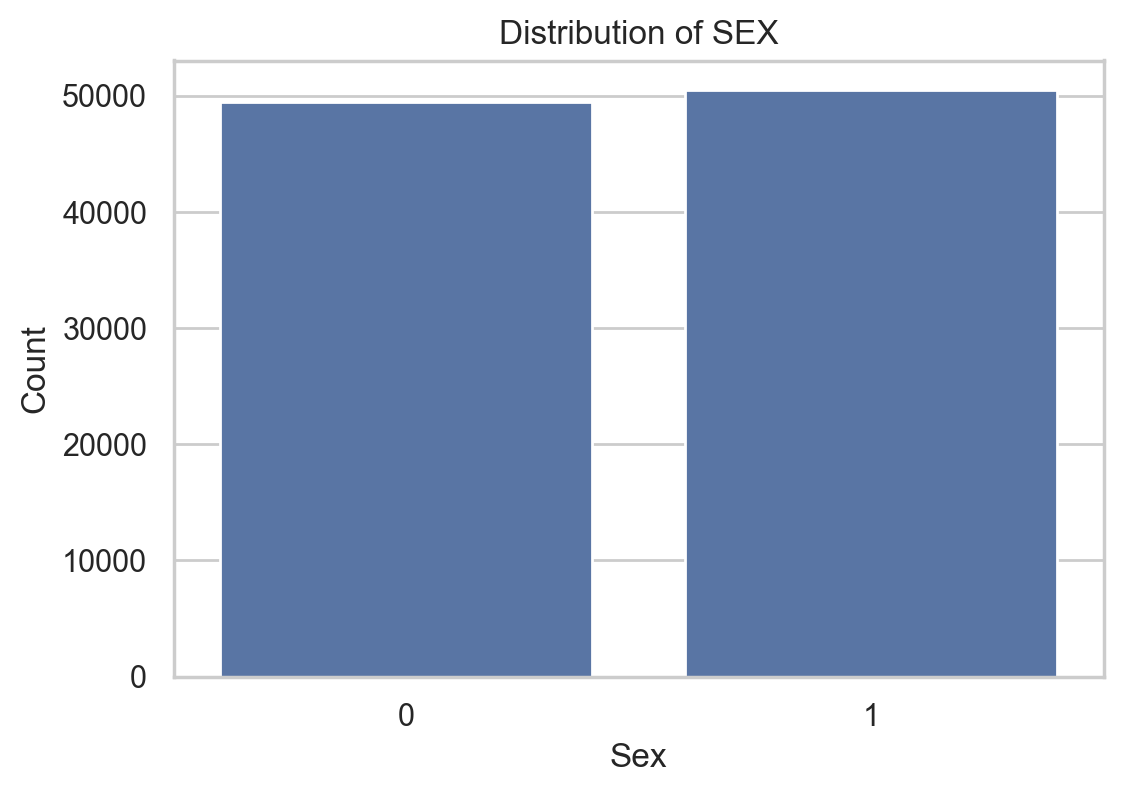

In [37]:
#Sex Distribution
sns.countplot(x='GENDER', data=cvd)
plt.title('Distribution of SEX')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


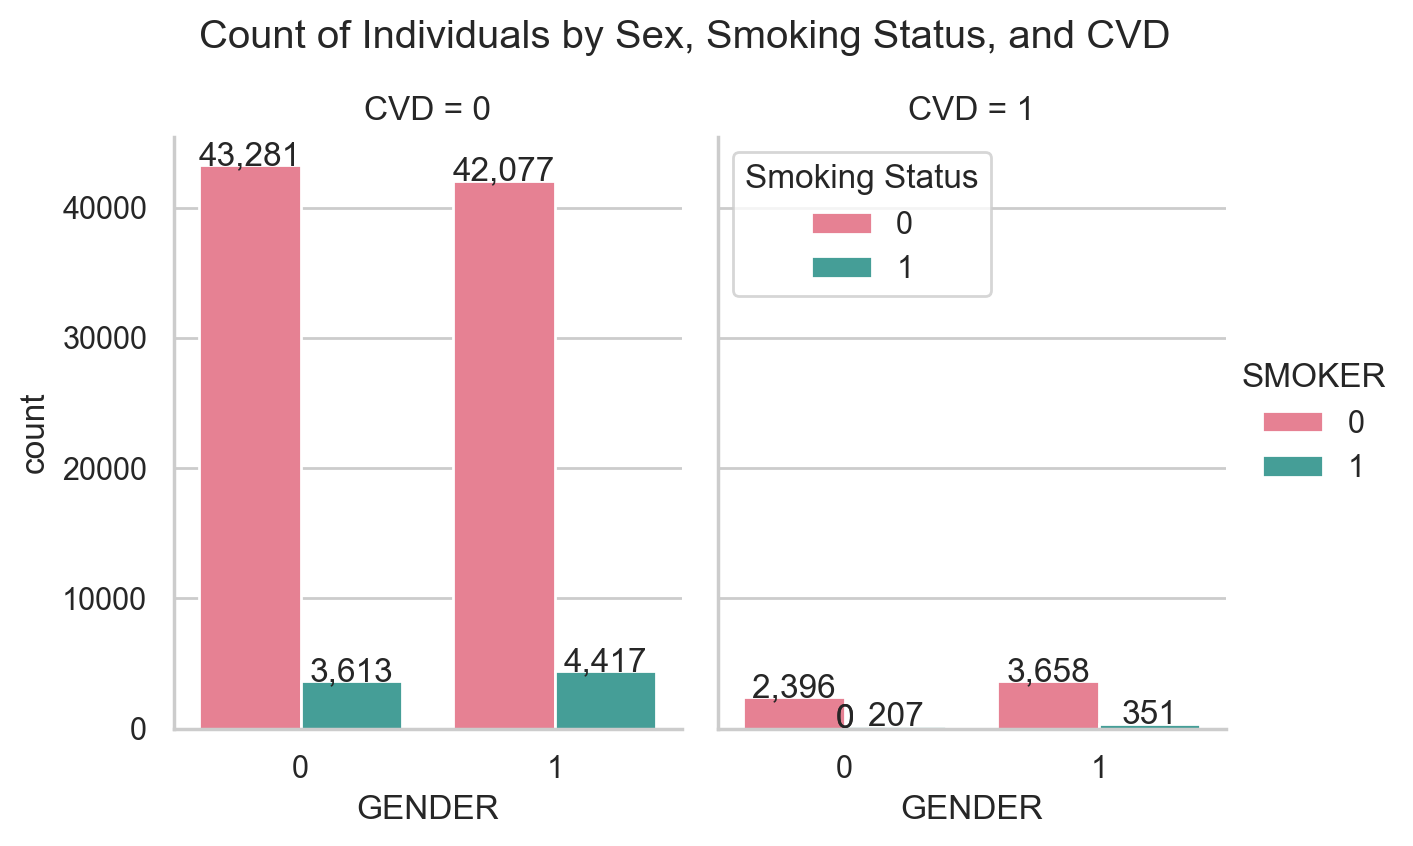

In [39]:
#Distribution of Individuals by Sex, Smoking Status, and CVD
sns.catplot(
    x="GENDER", 
    hue="SMOKER", 
    col="CVD", 
    kind="count", 
    data=cvd,
    palette="husl",  # Use a vibrant color palette
    height=4,       # Adjust plot height for better readability
    aspect=0.8      # Adjust aspect ratio for better fit
)

# Customize plot elements for clarity and aesthetics
plt.xticks(rotation=0)  # Rotate x-axis labels for better visibility
plt.legend(title="Smoking Status", loc="upper left")  # Position legend appropriately
plt.suptitle("Count of Individuals by Sex, Smoking Status, and CVD", y=1.05)  # Add a clear title

# Add annotations for key insights
for ax in plt.gcf().axes:
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(
            f"{height:,.0f}",  # Format counts with commas for readability
            xy=(p.get_x() + p.get_width() / 2, height + 2),  # Position annotations above bars
            ha="center"
        )

plt.show()


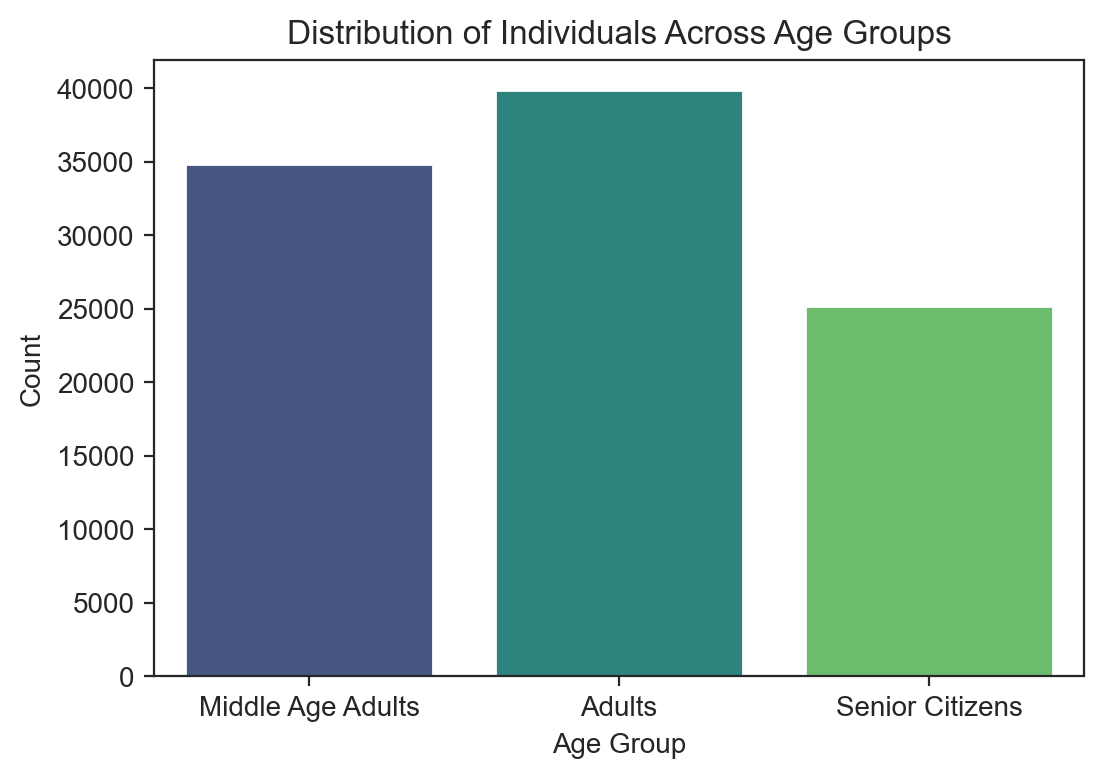

In [13]:
# User-defined function for age encoding to give us an idea of different age group in the dataset
def encode_age(data):
    if data <= 40:
        return 0
    elif 40 < data <= 60:
        return 1
    else:
        return 2
# Apply the age encoding function to create a new column 'AGE_GROUP'
cvd['age_group'] = cvd['AGE'].apply(encode_age)

# Map age group codes to descriptive names
age_group_names = {0: 'Adults', 1: 'Middle Age Adults', 2: 'Senior Citizens'}
cvd['AGE_GROUP_NAME'] = cvd['age_group'].map(age_group_names)

# Plotting the distribution of individuals in each age group
plt.figure(figsize=(6, 4))
sns.countplot(x='AGE_GROUP_NAME', data=cvd, palette='viridis')
plt.title('Distribution of Individuals Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


In [32]:
cvd.describe()

age            bmi         smoker            sbp  \
count  100000.00000  100000.000000  100000.000000  100000.000000   
mean       46.89020      26.987836       0.085880     129.915190   
std        16.96093       4.505503       0.280188      17.700571   
min        18.00000       6.000000       0.000000      50.000000   
25%        32.00000      24.100000       0.000000     118.000000   
50%        47.00000      27.200000       0.000000     130.000000   
75%        61.00000      30.000000       0.000000     142.000000   
max        79.00000      46.600000       1.000000     212.000000   

               hyptr          fhcvd         atrfib            ckd  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.124620       0.167050       0.010700       0.106320   
std         0.330289       0.373022       0.102886       0.308248   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

           arthritis       diabetes           copd            chd  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.009450       0.094840       0.081350       0.066120   
std         0.096751       0.292995       0.273373       0.248493   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

           age_group  
count  100000.000000  
mean        0.852990  
std         0.793476  
min         0.000000  
25%         0.000000  
50%         1.000000  
75%         2.000000  
max         2.000000

In [14]:
cvd.columns

Index(['GENDER', 'AGE', 'BMI', 'SMOKER', 'SYSBP', 'PREVHYP', 'FAMILY_HISTORY',
       'ATR_FIB', 'KIDNEY_DISEASE', 'ATHRITIS', 'DIABETES', 'COPD', 'TIME',
       'CVD', 'age_group', 'AGE_GROUP_NAME'],
      dtype='object')

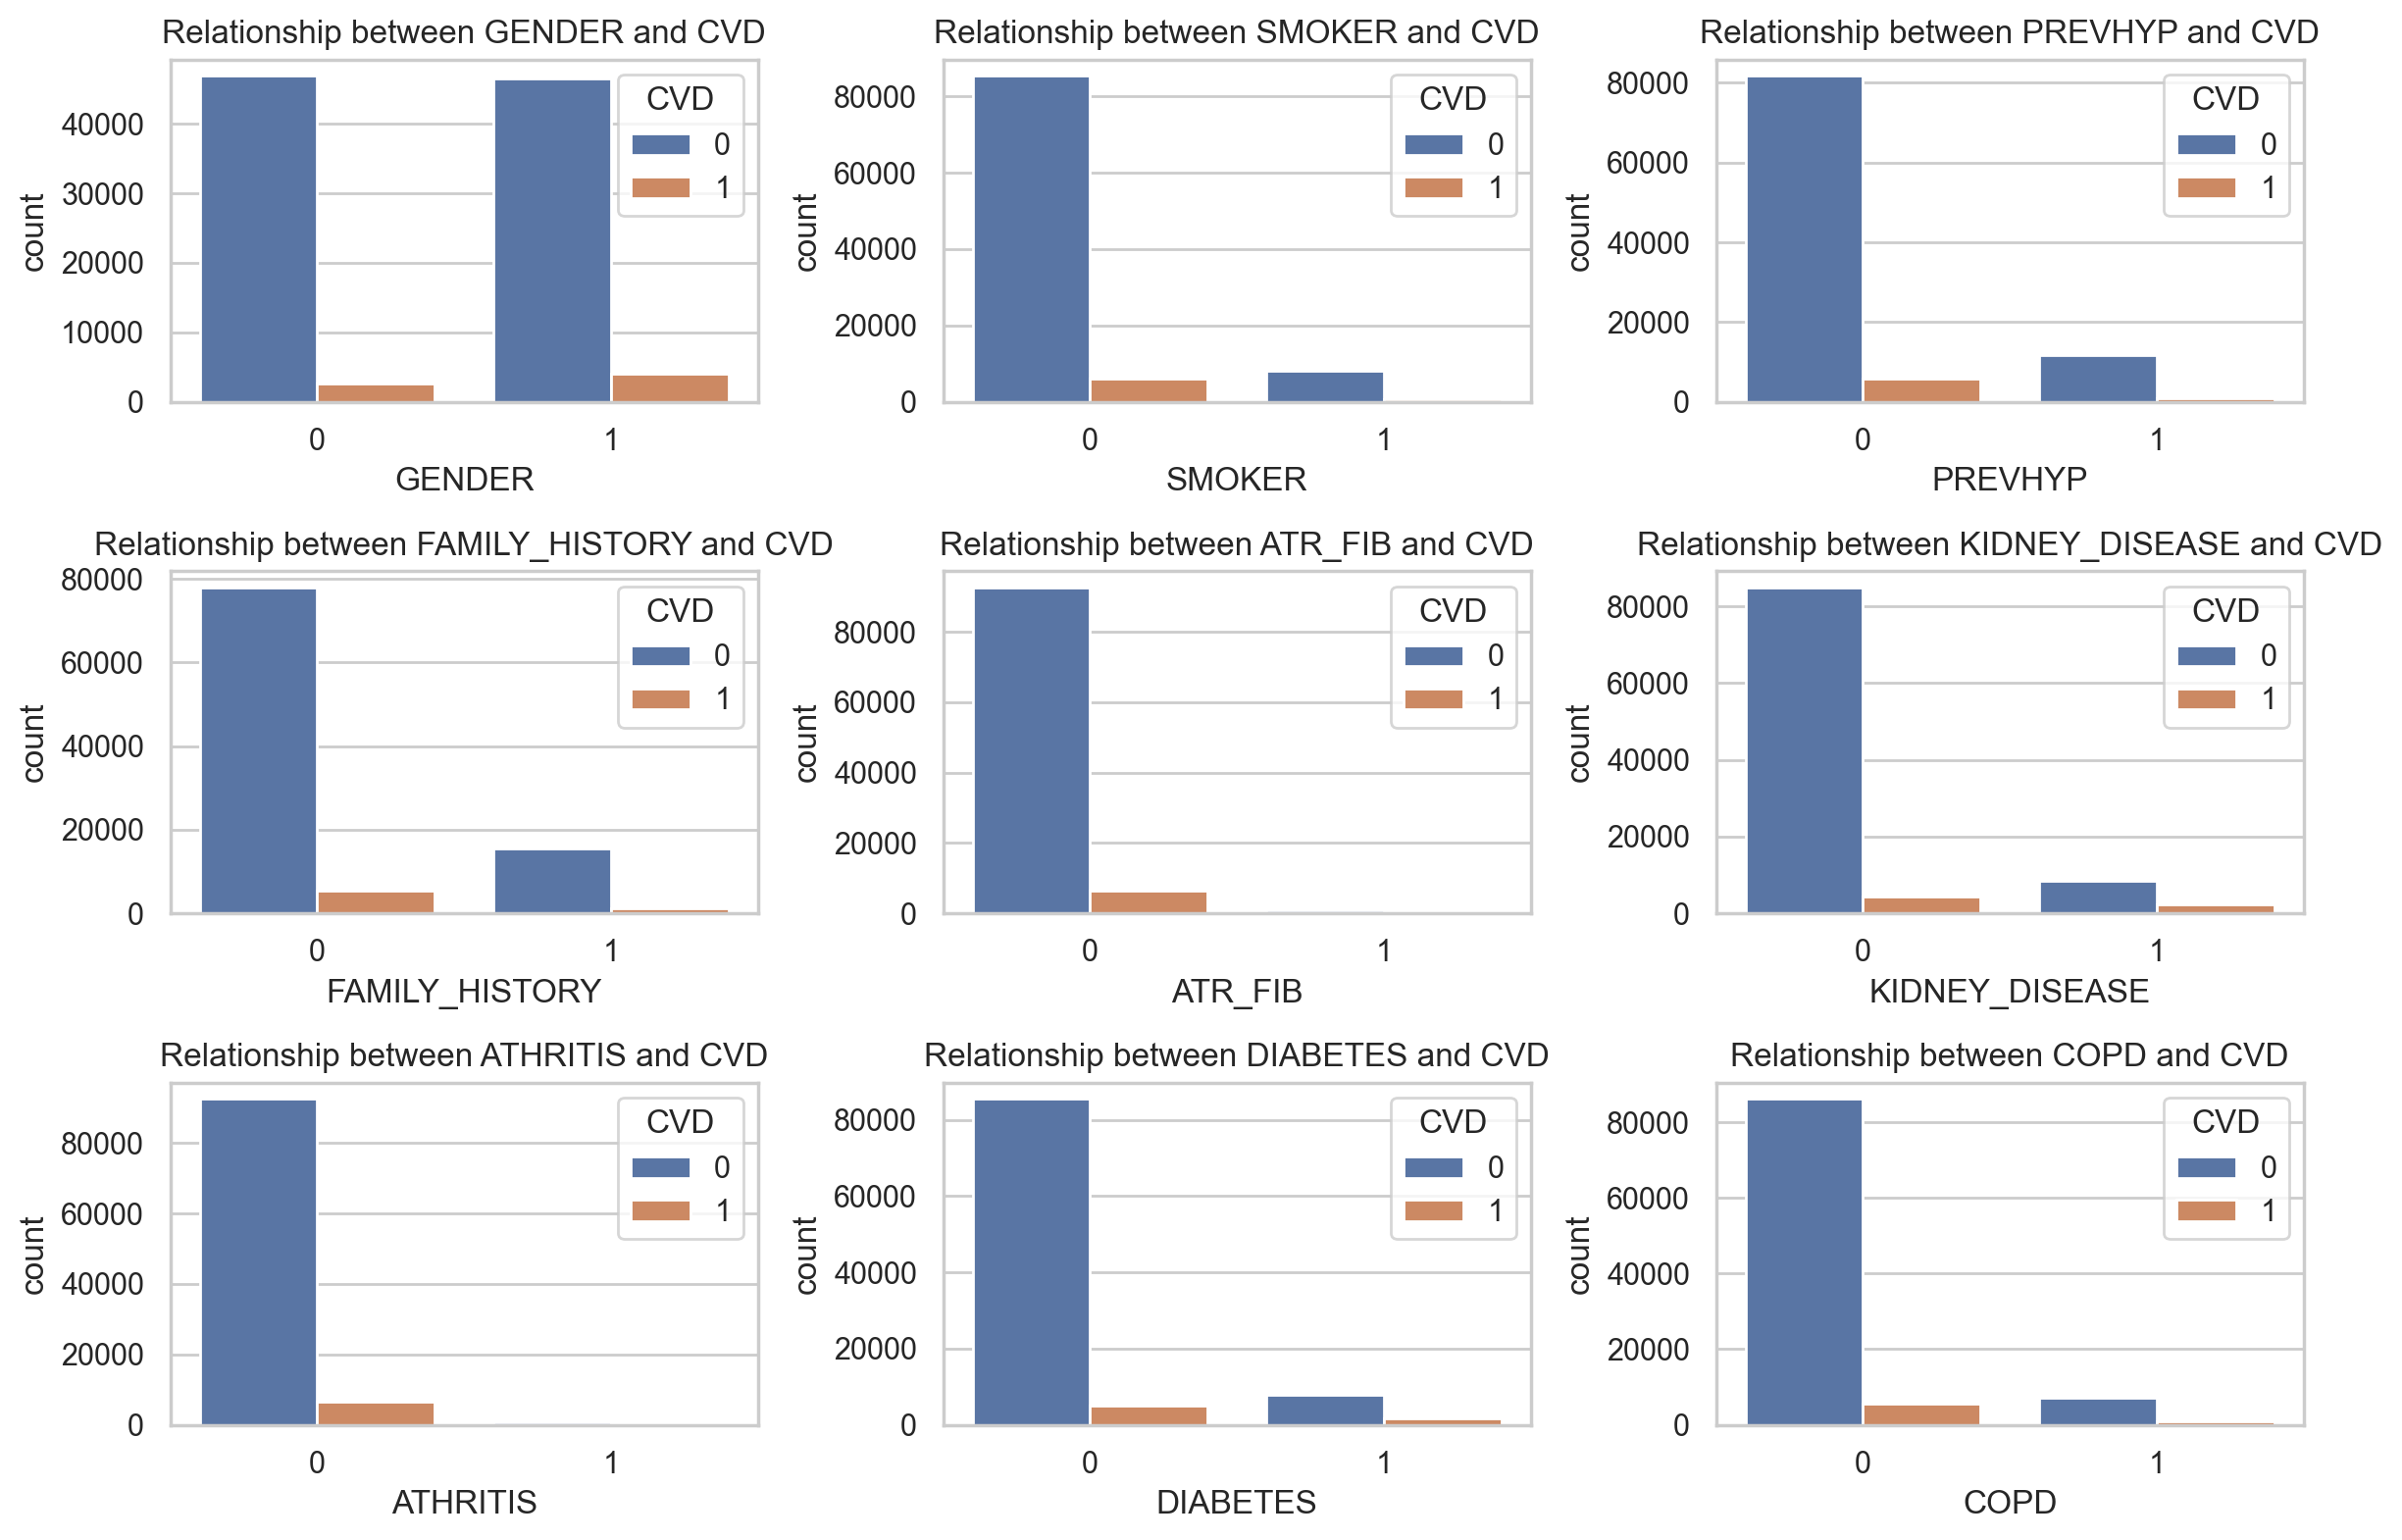

In [165]:
#Relationship between categorical variables and CVD
# List out the categorical variables
categorical_variables = ['GENDER', 'SMOKER', 'PREVHYP', 'FAMILY_HISTORY',
                         'ATR_FIB', 'KIDNEY_DISEASE', 'ATHRITIS', 'DIABETES', 'COPD']

# Set the style for the plots
sns.set(style="whitegrid")

# Create subplots for each categorical variable
plt.figure(figsize=(12, 8))  # Adjust figure size for better visualization
for i, var in enumerate(categorical_variables, 1):
    plt.subplot(3, 3, i)  # Create a grid of 3x3 for plotting
    sns.countplot(x=var, hue='CVD', data=cvd)
    plt.title(f'Relationship between {var} and CVD')
# Save the figure as an image file (e.g., PNG)
plt.savefig('categorical_relationship_with_cvd.png')  # You can specify the path here
# Adjust layout
plt.tight_layout()
plt.show()


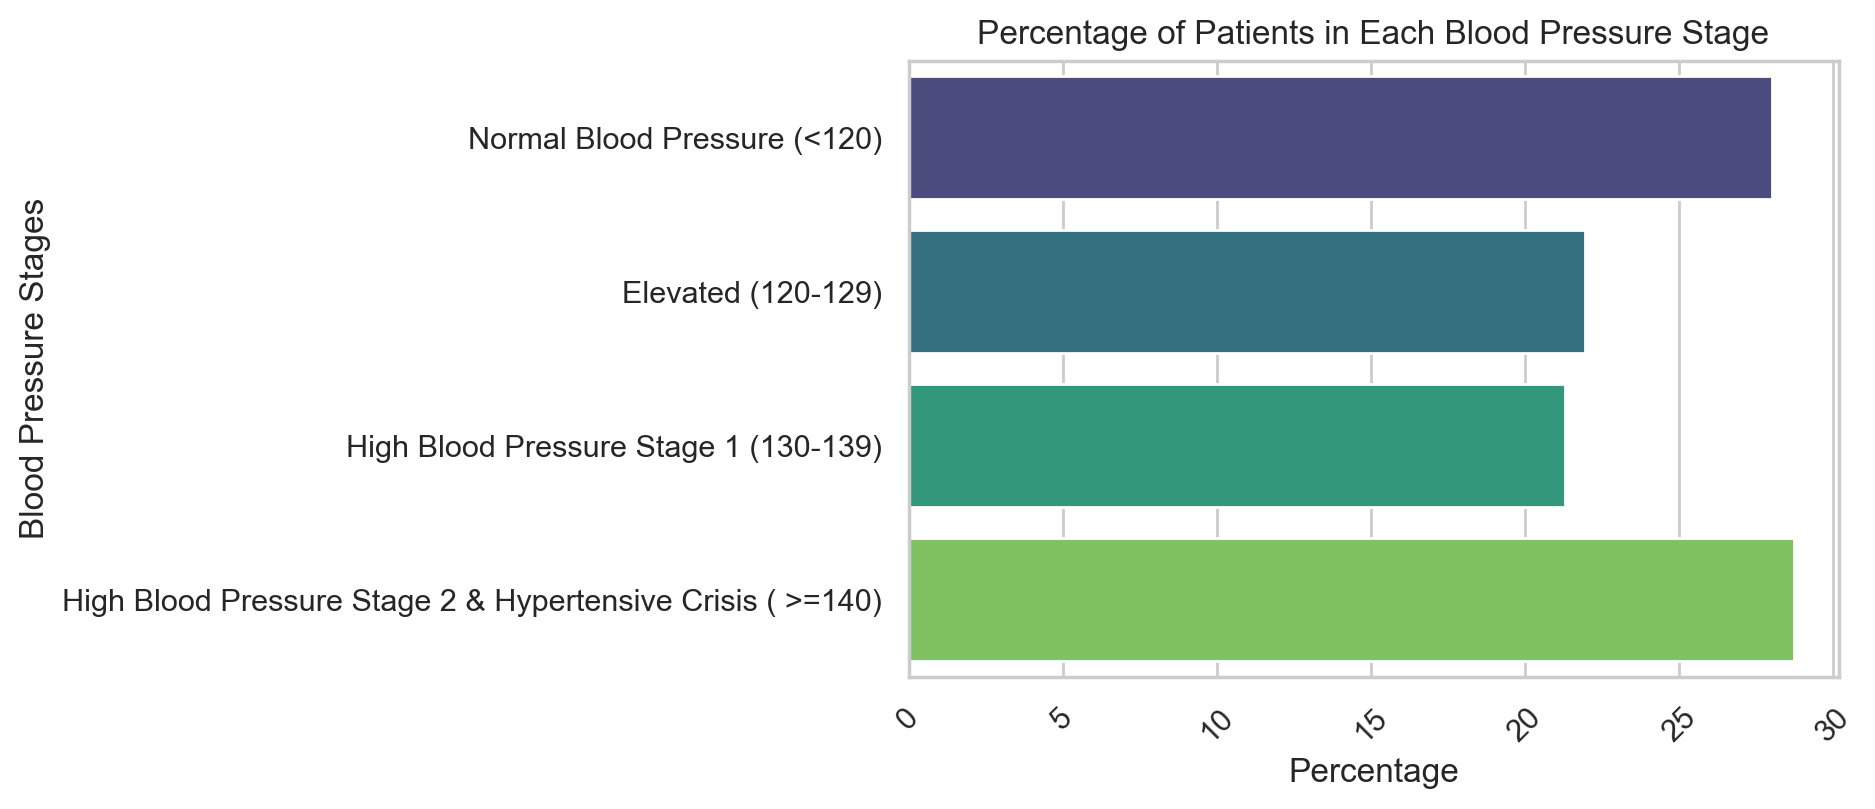

In [15]:
# Calculate the counts for each blood pressure stage
normal = len(cvd[cvd['SYSBP'] < 120])
elevated = len(cvd[cvd['SYSBP'].between(120, 129)])
hbpOne = len(cvd[cvd['SYSBP'].between(130, 139)])
hbpTwo = len(cvd[cvd['SYSBP'] >= 140])

# Create a list of blood pressure stages
blood_pressure_stages = [
    'Normal Blood Pressure (<120)',
    'Elevated (120-129)',
    'High Blood Pressure Stage 1 (130-139)',
    'High Blood Pressure Stage 2 & Hypertensive Crisis ( >=140)'
]

# Create a list of counts and calculate the percentage for each stage
counts = [normal, elevated, hbpOne, hbpTwo]
total_count = sum(counts)
percentage = [count / total_count * 100 for count in counts]

# Set the plot style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=percentage, y=blood_pressure_stages, palette='viridis')

# Set the plot labels and title
plt.xlabel('Percentage')
plt.ylabel('Blood Pressure Stages')
plt.title('Percentage of Patients in Each Blood Pressure Stage')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


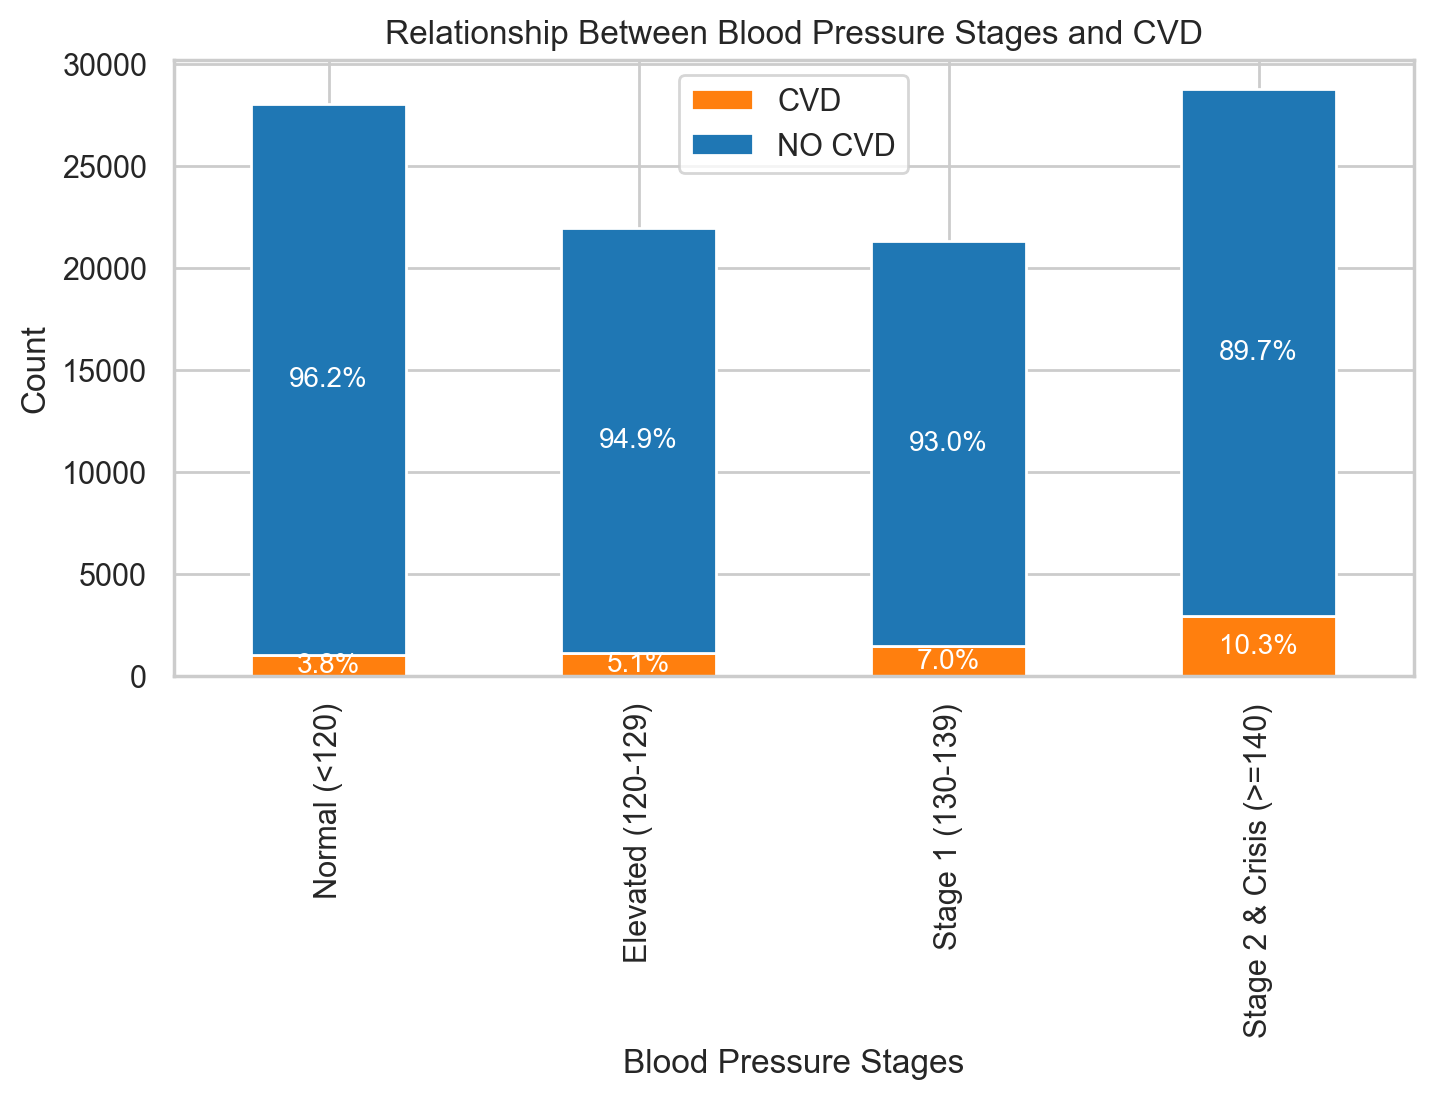

In [32]:
# Calculate the counts for each blood pressure stage with and without CVD
normal_cvd = len(cvd[(cvd['SYSBP'] < 120) & (cvd['CVD'] == 1)])
elevated_cvd = len(cvd[(cvd['SYSBP'].between(120, 129)) & (cvd['CVD'] == 1)])
hbpOne_cvd = len(cvd[(cvd['SYSBP'].between(130, 139)) & (cvd['CVD'] == 1)])
hbpTwo_cvd = len(cvd[(cvd['SYSBP'] >= 140) & (cvd['CVD'] == 1)])

normal_no_cvd = len(cvd[(cvd['SYSBP'] < 120) & (cvd['CVD'] == 0)])
elevated_no_cvd = len(cvd[(cvd['SYSBP'].between(120, 129)) & (cvd['CVD'] == 0)])
hbpOne_no_cvd = len(cvd[(cvd['SYSBP'].between(130, 139)) & (cvd['CVD'] == 0)])
hbpTwo_no_cvd = len(cvd[(cvd['SYSBP'] >= 140) & (cvd['CVD'] == 0)])

# Create the dataframe
bp_data = {
    'Stage': ['Normal (<120)', 'Elevated (120-129)', 'Stage 1 (130-139)', 'Stage 2 & Crisis (>=140)'],
    'CVD': [normal_cvd, elevated_cvd, hbpOne_cvd, hbpTwo_cvd, ],
    'NO CVD': [normal_no_cvd, elevated_no_cvd, hbpOne_no_cvd, hbpTwo_no_cvd]
}

bp_df = pd.DataFrame(bp_data)
bp_df.set_index('Stage', inplace=True)

# Plot the relationship between blood pressure stages and CVD
ax = bp_df.plot(kind='bar', stacked=True, color=['#ff7f0e', '#1f77b4'], figsize=(8, 4))

# Calculate percentages and annotate the bars
for stage in bp_df.index:
    total = bp_df.loc[stage].sum()
    cvd_percentage = (bp_df.loc[stage, 'CVD'] / total) * 100
    no_cvd_percentage = (bp_df.loc[stage, 'NO CVD'] / total) * 100
    
    ax.text(bp_df.index.get_loc(stage), bp_df.loc[stage, 'CVD'] / 2, f'{cvd_percentage:.1f}%', ha='center', va='center', color='white', fontsize=10)
    ax.text(bp_df.index.get_loc(stage), bp_df.loc[stage, 'CVD'] + (bp_df.loc[stage, 'NO CVD'] / 2), f'{no_cvd_percentage:.1f}%', ha='center', va='center', color='white', fontsize=10)

# Set plot labels and title
plt.ylabel('Count')
plt.xlabel('Blood Pressure Stages')
plt.title('Relationship Between Blood Pressure Stages and CVD')

# Display the plot
plt.show()


### Observation:  
- As blood pressure increases from normal to Stage 2 Hypertension, the percentage of individuals with CHD also increases.
- The likelihood of having CHD is highest in individuals with Stage 2 Hypertension, where 10.2% have CHD compared to 3.8% in the normal blood pressure category.

In [143]:
cvd.columns

Index(['GENDER', 'AGE', 'BMI', 'SMOKER', 'SYSBP', 'PREVHYP', 'FAMILY_HISTORY',
       'ATR_FIB', 'KIDNEY_DISEASE', 'ATHRITIS', 'DIABETES', 'COPD', 'TIME',
       'CVD'],
      dtype='object')

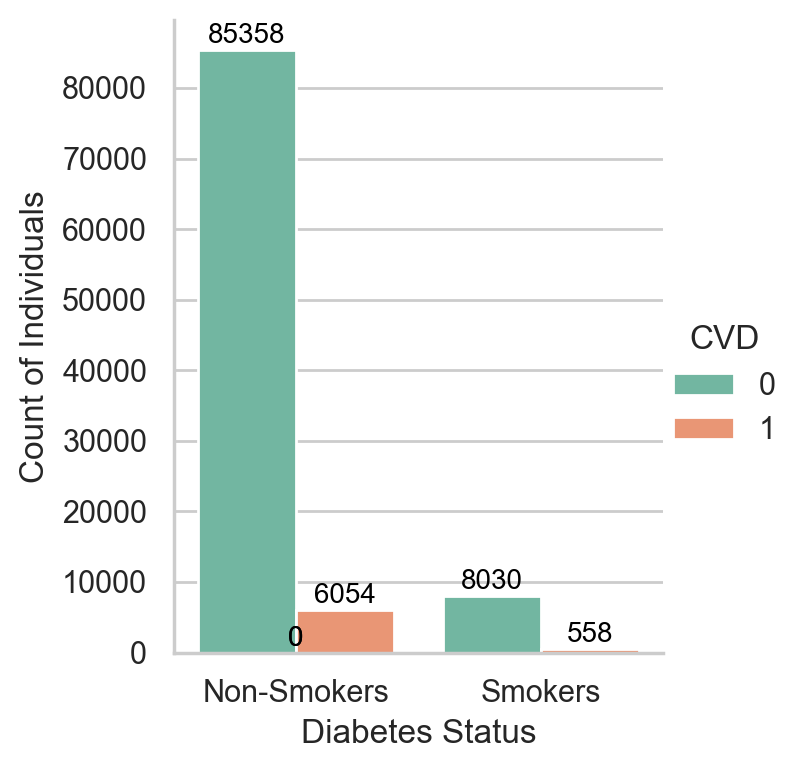

In [145]:
sns.set(style="whitegrid")
# Create a grouped bar plot
ax = sns.catplot(x='SMOKER', hue='CVD', kind='count', data=cvd, palette='Set2', height=4, aspect=0.9)
ax.set_axis_labels("Diabetes Status", "Count of Individuals")
ax.set_titles("Count of CVD Cases by Smoking Habit")
ax.set_xticklabels(['Non-Smokers', 'Smokers'])

# Add the counts on top of the bars
for p in ax.ax.patches:
    ax.ax.annotate(f'{int(p.get_height())}', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                   textcoords='offset points')

plt.show()


In [16]:
cvd.columns

Index(['GENDER', 'AGE', 'BMI', 'SMOKER', 'SYSBP', 'PREVHYP', 'FAMILY_HISTORY',
       'ATR_FIB', 'KIDNEY_DISEASE', 'ATHRITIS', 'DIABETES', 'COPD', 'TIME',
       'CVD', 'age_group', 'AGE_GROUP_NAME'],
      dtype='object')

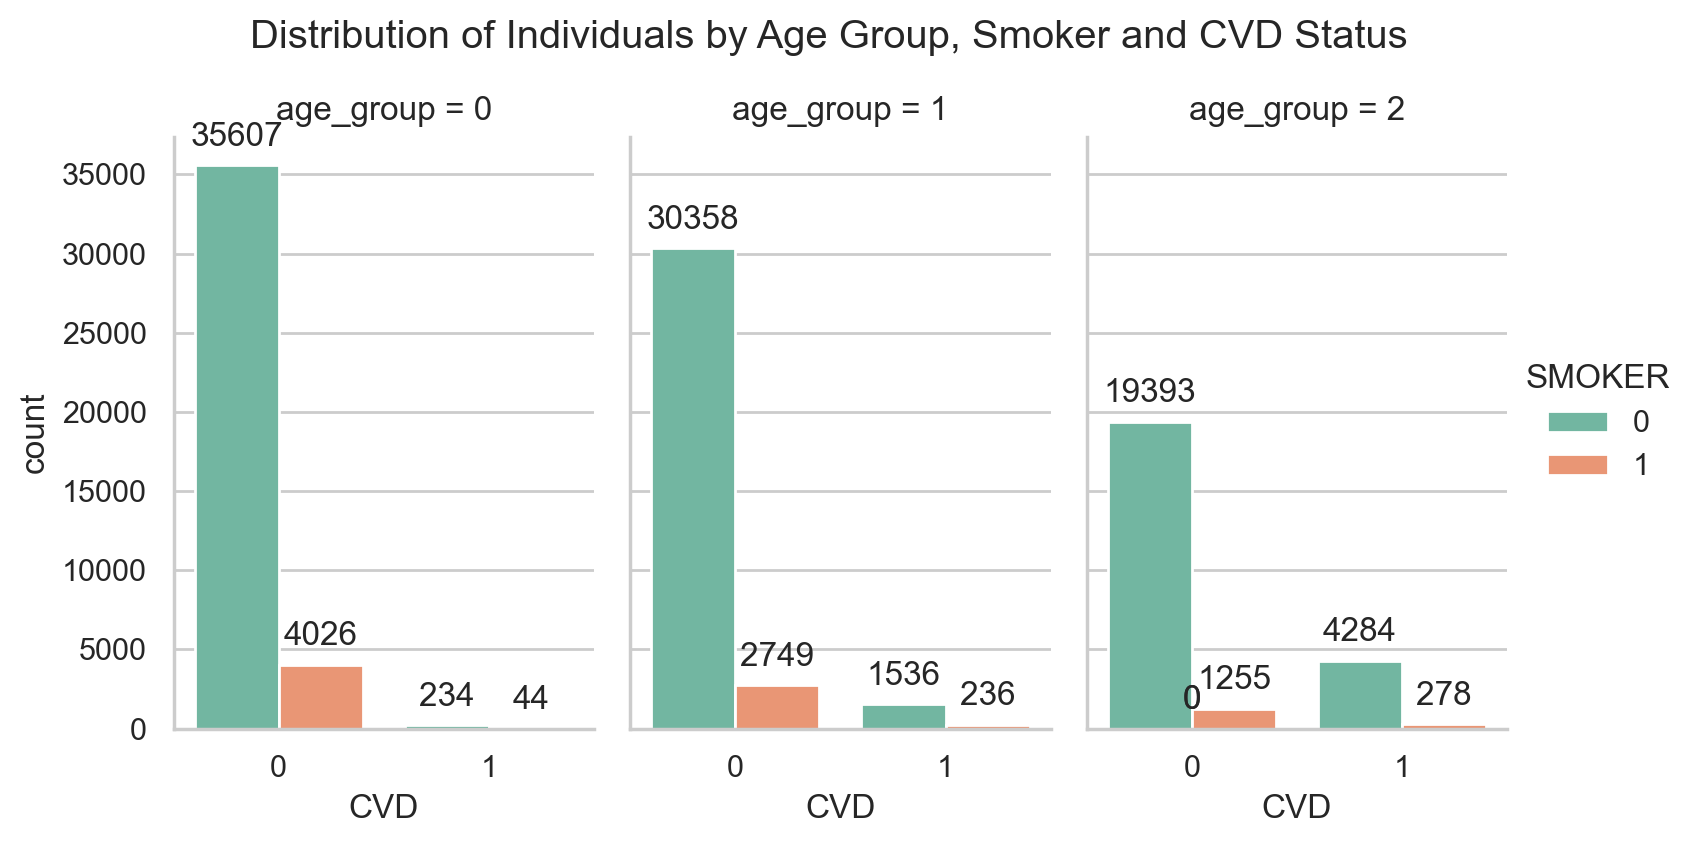

In [17]:
# Create the catplot with a diverse color palette
g = sns.catplot(
    x="CVD",
    hue="SMOKER",
    col="age_group",
    kind="count",
    data=cvd,
    palette="Set2",  # Use a color palette that's inclusive and accessible
    height=4,
    aspect=0.65
)

# Loop over each subplot (axes) to add bar labels
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(
            f'{int(p.get_height())}', 
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha = 'center', 
            va = 'center', 
            xytext = (0, 10), 
            textcoords = 'offset points'
        )

# Customize plot elements for clarity
plt.xticks(rotation=0)  # Ensure x-axis labels are correctly oriented

# Adjust the main title placement and ensure proper spacing
g.fig.suptitle("Distribution of Individuals by Age Group, Smoker and CVD Status", y=1.05)

# Show the plot
plt.show()


The plot indicates a potential association between smoking and CVD, with smokers having a higher likelihood of CVD across all age groups. Additionally, the prevalence of CVD appears to increase with age.

In [18]:
cvd1 = cvd.copy()
cvd1.head(5)

GENDER  AGE   BMI  SMOKER  SYSBP  PREVHYP  FAMILY_HISTORY  ATR_FIB  \
0       0   54  25.0       0  161.0        0               1        0   
1       1   31  25.0       0  121.0        0               0        0   
2       1   50  31.3       0  130.0        0               0        0   
3       1   61  30.0       0  165.0        0               0        0   
4       0   67  32.6       0  166.0        0               0        0   

   KIDNEY_DISEASE  ATHRITIS  DIABETES  COPD  TIME  CVD  age_group  \
0               0         0         0     0    10    0          1   
1               0         0         0     0    10    0          0   
2               0         0         0     0    10    0          1   
3               0         0         0     0     6    1          2   
4               0         0         0     0    10    0          2   

      AGE_GROUP_NAME  
0  Middle Age Adults  
1             Adults  
2  Middle Age Adults  
3    Senior Citizens  
4    Senior Citizens

In [19]:
cvd1.columns

Index(['GENDER', 'AGE', 'BMI', 'SMOKER', 'SYSBP', 'PREVHYP', 'FAMILY_HISTORY',
       'ATR_FIB', 'KIDNEY_DISEASE', 'ATHRITIS', 'DIABETES', 'COPD', 'TIME',
       'CVD', 'age_group', 'AGE_GROUP_NAME'],
      dtype='object')

In [20]:
cvd1.dtypes

GENDER              int64
AGE                 int64
BMI               float64
SMOKER              int64
SYSBP             float64
PREVHYP             int64
FAMILY_HISTORY      int64
ATR_FIB             int64
KIDNEY_DISEASE      int64
ATHRITIS            int64
DIABETES            int64
COPD                int64
TIME                int64
CVD                 int64
age_group           int64
AGE_GROUP_NAME     object
dtype: object

### MODEL BUILDING

In [47]:
#lets find the univariate analysis of the data to know features that are significant
import statsmodels.api as sm

# Define the outcome variable
outcome = 'CVD'

# List of predictors for univariate analysis
predictors = [
    'GENDER', 'AGE', 'BMI', 'SMOKER', 'SYSBP', 'PREVHYP', 'FAMILY_HISTORY',
       'ATR_FIB', 'KIDNEY_DISEASE', 'ATHRITIS', 'DIABETES', 'COPD', 'TIME'
       
]
# Perform univariate logistic regression for each predictor
univariate_results = {}

for predictor in predictors:
    X = sm.add_constant(cvd1[predictor]) 
    model = sm.Logit(cvd1[outcome], X)
    
    try:
        result = model.fit(disp=0) # Suppress convergence output
        univariate_results[predictor] = result.summary2().tables[1] 
    except Exception as e:
        print(f"Error for {predictor}: {e}")
        univariate_results[predictor] = None  # Store None for failed models

# Display the univariate results for each predictor
for predictor, result in univariate_results.items():
    if result is not None:
        print(f"Univariate Logistic Regression for {predictor}:\n")
        print(result)
        print("\n" + "-"*80 + "\n")
    else:
        print(f"Univariate Logistic Regression for {predictor} failed to converge.\n")
        print("\n" + "-"*80 + "\n")


Univariate Logistic Regression for GENDER:

           Coef.  Std.Err.           z         P>|z|    [0.025    0.975]
const  -2.891225  0.020137 -143.578097  0.000000e+00 -2.930693 -2.851757
GENDER  0.440444  0.026009   16.934584  2.501189e-64  0.389468  0.491419

--------------------------------------------------------------------------------

Univariate Logistic Regression for AGE:

          Coef.  Std.Err.           z  P>|z|    [0.025    0.975]
const -7.286124  0.069673 -104.576229    0.0 -7.422680 -7.149568
AGE    0.082647  0.001079   76.621226    0.0  0.080533  0.084761

--------------------------------------------------------------------------------

Univariate Logistic Regression for BMI:

          Coef.  Std.Err.          z         P>|z|    [0.025    0.975]
const -3.369479  0.079358 -42.459155  0.000000e+00 -3.525018 -3.213940
BMI    0.026510  0.002854   9.290332  1.538083e-20  0.020917  0.032103

--------------------------------------------------------------------------------

### Univariate Logistic Regression Analysis

In this analysis, we conducted a series of univariate logistic regression analyses to examine the relationship between each predictor variable and the presence or absence of cardiovascular disease (CVD). The goal is to identify which variables are significantly associated with CVD when considered individually.

#### Method:
- **Logistic Regression**: As outlined in *Applied Logistic Regression* by Hosmer, Lemeshow, and Sturdivant, logistic regression is a powerful tool for modeling binary outcome variables, such as the presence or absence of CVD.
- **Univariate Analysis**: Following the guidance in the textbook (Chapter 4), univariate logistic regression was used to assess each predictor independently. This allows us to explore the direct effect of each variable on the likelihood of CVD without the influence of other variables.

For each predictor, the following statistics were obtained:
- **Coefficient (Coef.)**: Represents the change in the log odds of CVD for a one-unit increase in the predictor. A positive coefficient suggests that as the predictor increases, the likelihood of CVD increases.
- **Standard Error (Std.Err.)**: Indicates the precision of the coefficient estimate. Smaller values suggest more reliable estimates.
- **z-value**: The ratio of the coefficient to its standard error, used to test the significance of the predictor.
- **P>|z|**: The p-value tests the null hypothesis that the coefficient is zero. A low p-value (< 0.05) indicates that the predictor is significantly associated with CVD.
- **95% Confidence Interval [0.025, 0.975]**: If this interval does not include zero, the predictor is considered statistically significant.

#### Interpretation:
- **Significant Predictors**: Variables such as `gender`, `age`, `bmi`, `sbp`, `fhcvd`, `atrfib`, `ckd`, `arthritis`, `diabetes`, `copd`, and `time` demonstrated significant associations with the presence of CVD, as evidenced by their low p-values and confidence intervals that do not include zero.
- **Non-Significant Predictors**: Variables such as `smoker` and `hyptr` were not significantly associated with CVD, as indicated by their higher p-values (> 0.05).

By evaluating each predictor individually, this step helps in understanding the direct impact of specific variables on the likelihood of CVD, aligning with the textbook's emphasis on methodical model development.


In [21]:
cvd1.columns

Index(['GENDER', 'AGE', 'BMI', 'SMOKER', 'SYSBP', 'PREVHYP', 'FAMILY_HISTORY',
       'ATR_FIB', 'KIDNEY_DISEASE', 'ATHRITIS', 'DIABETES', 'COPD', 'TIME',
       'CVD', 'age_group', 'AGE_GROUP_NAME'],
      dtype='object')

In [22]:
#let's drop the forced_expiratory_volume_1 as it has too many missing values and patient_id as it has no predictive value.

# List of features to remove
features_to_remove = ['age_group','AGE_GROUP_NAME']

# Remove the specified features from the DataFrame
cvd1 = cvd1.drop(features_to_remove, axis=1)
cvd1.head(3)

GENDER  AGE   BMI  SMOKER  SYSBP  PREVHYP  FAMILY_HISTORY  ATR_FIB  \
0       0   54  25.0       0  161.0        0               1        0   
1       1   31  25.0       0  121.0        0               0        0   
2       1   50  31.3       0  130.0        0               0        0   

   KIDNEY_DISEASE  ATHRITIS  DIABETES  COPD  TIME  CVD  
0               0         0         0     0    10    0  
1               0         0         0     0    10    0  
2               0         0         0     0    10    0

In [23]:
cvd1.columns

Index(['GENDER', 'AGE', 'BMI', 'SMOKER', 'SYSBP', 'PREVHYP', 'FAMILY_HISTORY',
       'ATR_FIB', 'KIDNEY_DISEASE', 'ATHRITIS', 'DIABETES', 'COPD', 'TIME',
       'CVD'],
      dtype='object')

In [105]:
cvd.columns

Index(['GENDER', 'AGE', 'BMI', 'SMOKER', 'SYSBP', 'PREVHYP', 'FAMILY_HISTORY',
       'ATR_FIB', 'KIDNEY_DISEASE', 'ATHRITIS', 'DIABETES', 'COPD', 'TIME',
       'CVD'],
      dtype='object')

### BASELINE MODEL

Optimization terminated successfully.
         Current function value: 0.059475
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                    CVD   No. Observations:                60000
Model:                          Logit   Df Residuals:                    59986
Method:                           MLE   Df Model:                           13
Date:                Fri, 27 Sep 2024   Pseudo R-squ.:                  0.7553
Time:                        20:52:35   Log-Likelihood:                -3568.5
converged:                       True   LL-Null:                       -14582.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -4.2439      0.057    -74.716      0.000      -4.355      -4.133
GENDER          

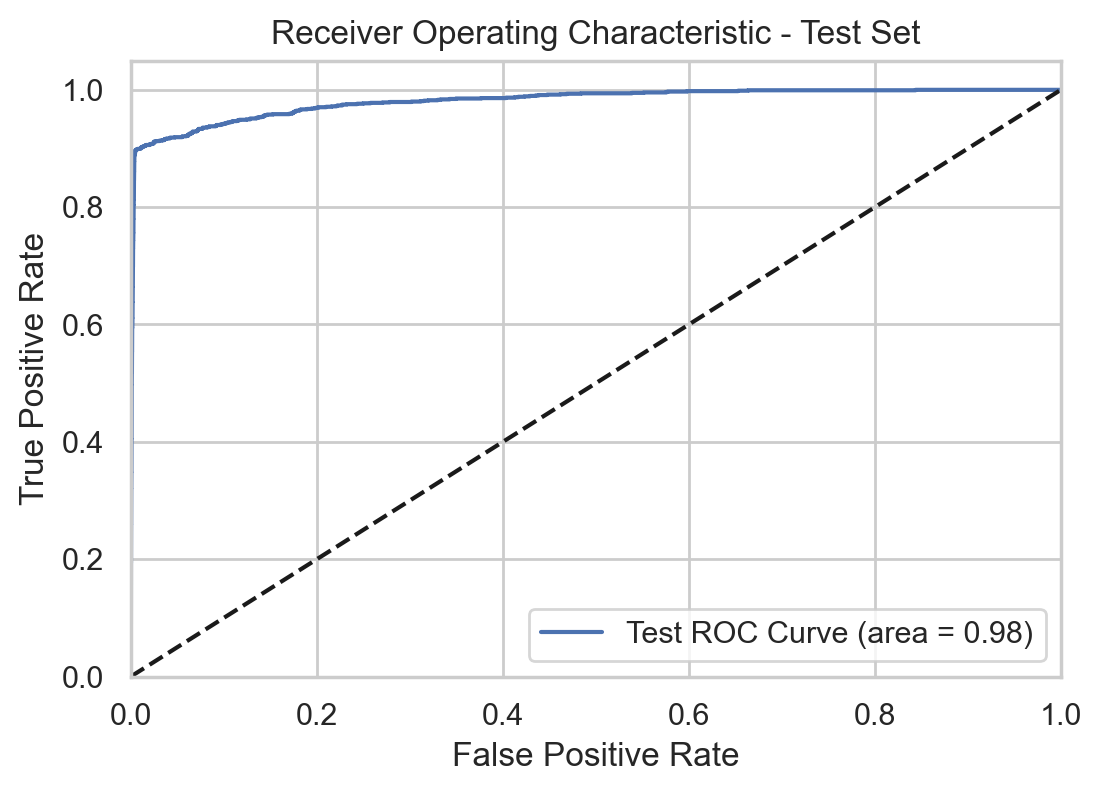

In [24]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd

# Define features and target
X = cvd1.drop('CVD', axis=1)
y = cvd1['CVD']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)  # Retain column names after scaling

# Split data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.15 x 0.9 = 0.2

# Fit a Logistic Regression model using MLE
X_train_const = sm.add_constant(X_train)  # Adding a constant for intercept
model = sm.Logit(y_train, X_train_const).fit()

# Print the model summary
print(model.summary())

# Calculate odds ratios and 95% confidence intervals
odds_ratios = pd.DataFrame({
    'Feature': X_train_const.columns,
    'Odds Ratio': model.params.apply(lambda x: round(np.exp(x), 4)),
    'Lower 95% CI': model.conf_int()[0].apply(lambda x: round(np.exp(x), 4)),
    'Upper 95% CI': model.conf_int()[1].apply(lambda x: round(np.exp(x), 4))
})



# Display odds ratios
print("\nOdds Ratios and 95% Confidence Intervals:")
print(odds_ratios)

# Evaluate the model on the validation set
X_val_const = sm.add_constant(X_val)  # Add constant to validation set
y_pred_proba_val = model.predict(X_val_const)
y_pred_val = (y_pred_proba_val >= 0.5).astype(int)

# Evaluation metrics for validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
precision_val = precision_score(y_val, y_pred_val)
recall_val = recall_score(y_val, y_pred_val)
f1_val = f1_score(y_val, y_pred_val)
roc_auc_val = roc_auc_score(y_val, y_pred_proba_val)

# Evaluate the model on the test set
X_test_const = sm.add_constant(X_test)  # Add constant to test set
y_pred_proba_test = model.predict(X_test_const)
y_pred_test = (y_pred_proba_test >= 0.5).astype(int)

# Evaluation metrics for test set
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
roc_auc_test = roc_auc_score(y_test, y_pred_proba_test)

# Print evaluation metrics
print("Validation Set Metrics:")
print(f"Accuracy: {accuracy_val:.4f}, Precision: {precision_val:.4f}, Recall: {recall_val:.4f}, F1 Score: {f1_val:.4f}, ROC AUC: {roc_auc_val:.4f}")
print("Test Set Metrics:")
print(f"Accuracy: {accuracy_test:.4f}, Precision: {precision_test:.4f}, Recall: {recall_test:.4f}, F1 Score: {f1_test:.4f}, ROC AUC: {roc_auc_test:.4f}")

# Plot ROC curve for test set
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_test)
plt.figure()
plt.plot(fpr, tpr, label=f'Test ROC Curve (area = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Test Set')
plt.legend(loc="lower right")
plt.show()


### Observation  
The baseline model shows that gender, age, BMI, smoking status, SBP, family history of CVD, diabetes, and time are significant predictors of cardiovascular disease. Non-significant variables may require further exploration or exclusion in refined models.


## SMOTE 

Validation Set Metrics:
Accuracy: 0.9911
Precision: 0.9555
Recall: 0.9057
F1 Score: 0.9299
ROC AUC: 0.9832

Test Set Metrics:
Accuracy: 0.9898
Precision: 0.9421
Recall: 0.9038
F1 Score: 0.9226
ROC AUC: 0.9811


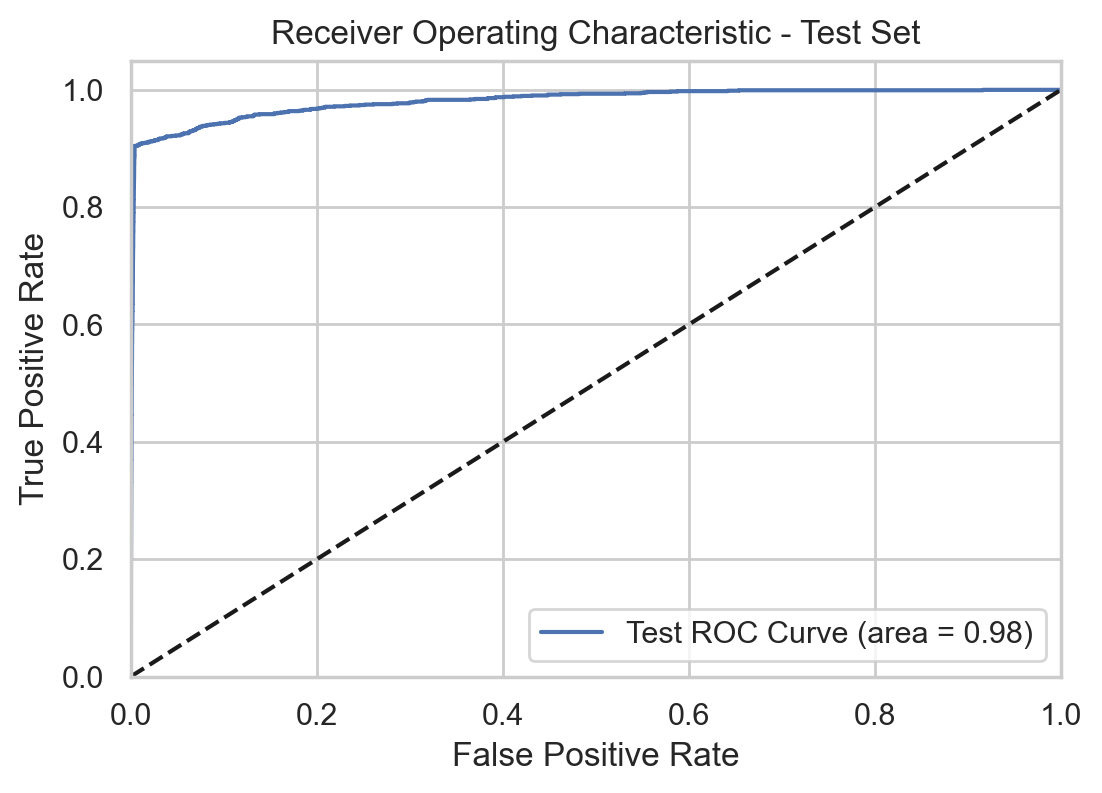

In [25]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt


# Separate features and target
X = cvd1.drop('CVD', axis=1)
y = cvd1['CVD']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Split data into train, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train the logistic regression model on the SMOTE data
model = LogisticRegression(random_state=42)
model.fit(X_train_smote, y_train_smote)

# Validation set predictions
y_pred_val = model.predict(X_val)
y_pred_proba_val = model.predict_proba(X_val)[:, 1]

# Test set predictions
y_pred_test = model.predict(X_test)
y_pred_proba_test = model.predict_proba(X_test)[:, 1]

# Evaluation metrics
metrics_val = {
    "Accuracy": accuracy_score(y_val, y_pred_val),
    "Precision": precision_score(y_val, y_pred_val),
    "Recall": recall_score(y_val, y_pred_val),
    "F1 Score": f1_score(y_val, y_pred_val),
    "ROC AUC": roc_auc_score(y_val, y_pred_proba_val)
}

metrics_test = {
    "Accuracy": accuracy_score(y_test, y_pred_test),
    "Precision": precision_score(y_test, y_pred_test),
    "Recall": recall_score(y_test, y_pred_test),
    "F1 Score": f1_score(y_test, y_pred_test),
    "ROC AUC": roc_auc_score(y_test, y_pred_proba_test)
}

# Print evaluation results
print("Validation Set Metrics:")
for key, value in metrics_val.items():
    print(f"{key}: {value:.4f}")

print("\nTest Set Metrics:")
for key, value in metrics_test.items():
    print(f"{key}: {value:.4f}")

# Plot ROC curve for test set
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_test)
plt.figure()
plt.plot(fpr, tpr, label=f'Test ROC Curve (area = {metrics_test["ROC AUC"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Test Set')
plt.legend(loc="lower right")
plt.show()


Observation:
- The model demonstrates strong performance on both the validation and test sets, with high accuracy, precision, recall, and F1-scores.
- The high AUC values on both sets indicate that the model is highly effective at distinguishing between positive and negative classes.
- The consistency between validation and test metrics suggests that the model generalizes well to unseen data, indicating good stability and reliability.

### STEPWISE REGRESSION

In [26]:
import statsmodels.api as sm

def stepwise_selection(X, y, initial_list=[], threshold_in=0.005, threshold_out=0.01, verbose=True):
    included = list(initial_list)
    while True:
        changed = False
        # Forward step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.Logit(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit(disp=0)
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # Backward step
        model = sm.Logit(y, sm.add_constant(pd.DataFrame(X[included]))).fit(disp=0)
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))

        if not changed:
            break

    return included

# Example usage
X = cvd1.drop('CVD', axis=1)  # feature dataframe
y = cvd1['CVD']               # target variable

selected_features = stepwise_selection(X, y)

print('Selected features:', selected_features)


Add  KIDNEY_DISEASE                 with p-value 0.0
Add  TIME                           with p-value 0.0
Add  AGE                            with p-value 2.61514e-178
Drop KIDNEY_DISEASE                 with p-value 0.572215
Add  GENDER                         with p-value 2.27091e-13
Add  DIABETES                       with p-value 2.35613e-08
Add  SYSBP                          with p-value 3.21475e-05
Selected features: ['TIME', 'AGE', 'GENDER', 'DIABETES', 'SYSBP']


This final model, selected via stepwise regression, retains the most significant predictors of cardiovascular disease while excluding non-contributory variables, which can help in reducing model complexity and enhancing interpretability.




Add  KIDNEY_DISEASE                 with p-value 0.0
Add  TIME                           with p-value 0.0
Add  AGE                            with p-value 2.61514e-178
Drop KIDNEY_DISEASE                 with p-value 0.572215
Add  GENDER                         with p-value 2.27091e-13
Add  DIABETES                       with p-value 2.35613e-08
Add  SYSBP                          with p-value 3.21475e-05
Selected features: ['TIME', 'AGE', 'GENDER', 'DIABETES', 'SYSBP']
Optimization terminated successfully.
         Current function value: 0.059652
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                    CVD   No. Observations:                60000
Model:                          Logit   Df Residuals:                    59994
Method:                           MLE   Df Model:                            5
Date:                Fri, 27 Sep 2024   Pseudo R-squ.:                  0.7546
Time:                      

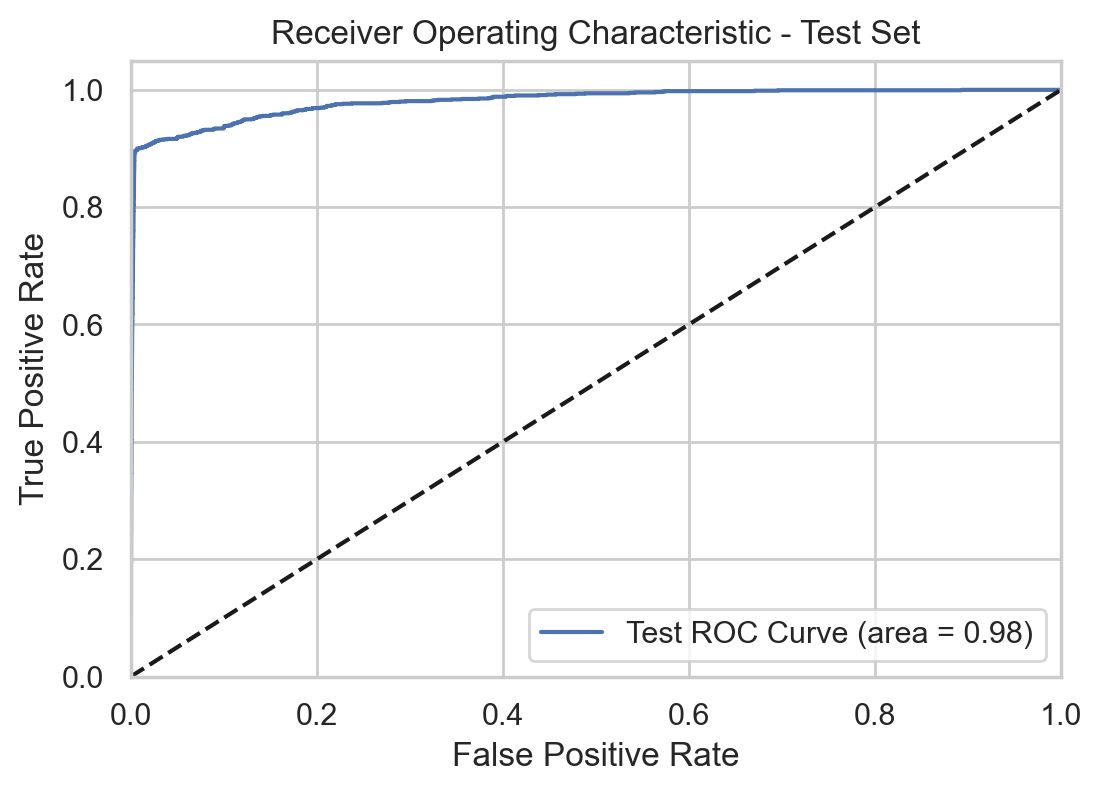

In [27]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Selected features from stepwise regression process
selected_features = stepwise_selection(X, y)

print('Selected features:', selected_features)

# Define the dataset using selected features
X = cvd1[selected_features]
y = cvd1['CVD']

# Split the data into train, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Add a constant (intercept) to the features
X_train_const = sm.add_constant(X_train)
X_val_const = sm.add_constant(X_val)
X_test_const = sm.add_constant(X_test)

# Fit a logistic regression model using MLE (Maximum Likelihood Estimation)
logit_model = sm.Logit(y_train, X_train_const).fit(method='newton')  # Using Newton-Raphson method for MLE

# Print the model summary
print(logit_model.summary())


# Evaluate the model on the validation set
y_pred_proba_val = logit_model.predict(X_val_const)
y_pred_val = (y_pred_proba_val >= 0.5).astype(int)

# Evaluation metrics for validation set
val_accuracy = accuracy_score(y_val, y_pred_val)
val_precision = precision_score(y_val, y_pred_val)
val_recall = recall_score(y_val, y_pred_val)
val_f1 = f1_score(y_val, y_pred_val)
val_roc_auc = roc_auc_score(y_val, y_pred_proba_val)

# Evaluate the model on the test set
y_pred_proba_test = logit_model.predict(X_test_const)
y_pred_test = (y_pred_proba_test >= 0.5).astype(int)

# Evaluation metrics for test set
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)
test_roc_auc = roc_auc_score(y_test, y_pred_proba_test)

# Print evaluation metrics
print("Validation Set Metrics:")
print(f"Accuracy: {val_accuracy:.4f}, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, F1 Score: {val_f1:.4f}, ROC AUC: {val_roc_auc:.4f}")
print("Test Set Metrics:")
print(f"Accuracy: {test_accuracy:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1 Score: {test_f1:.4f}, ROC AUC: {test_roc_auc:.4f}")

# Plot ROC curve for test set
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_test)
plt.figure()
plt.plot(fpr, tpr, label=f'Test ROC Curve (area = {test_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Test Set')
plt.legend(loc="lower right")
plt.show()


### SMOTE + STEPWISE REGRESSION

Optimization terminated successfully.
         Current function value: 0.101630
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                    CVD   No. Observations:               112086
Model:                          Logit   Df Residuals:                   112080
Method:                           MLE   Df Model:                            5
Date:                Fri, 27 Sep 2024   Pseudo R-squ.:                  0.8534
Time:                        20:55:36   Log-Likelihood:                -11391.
converged:                       True   LL-Null:                       -77692.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.1434      0.494     81.233      0.000      39.175      41.112
TIME          -4.7167      0

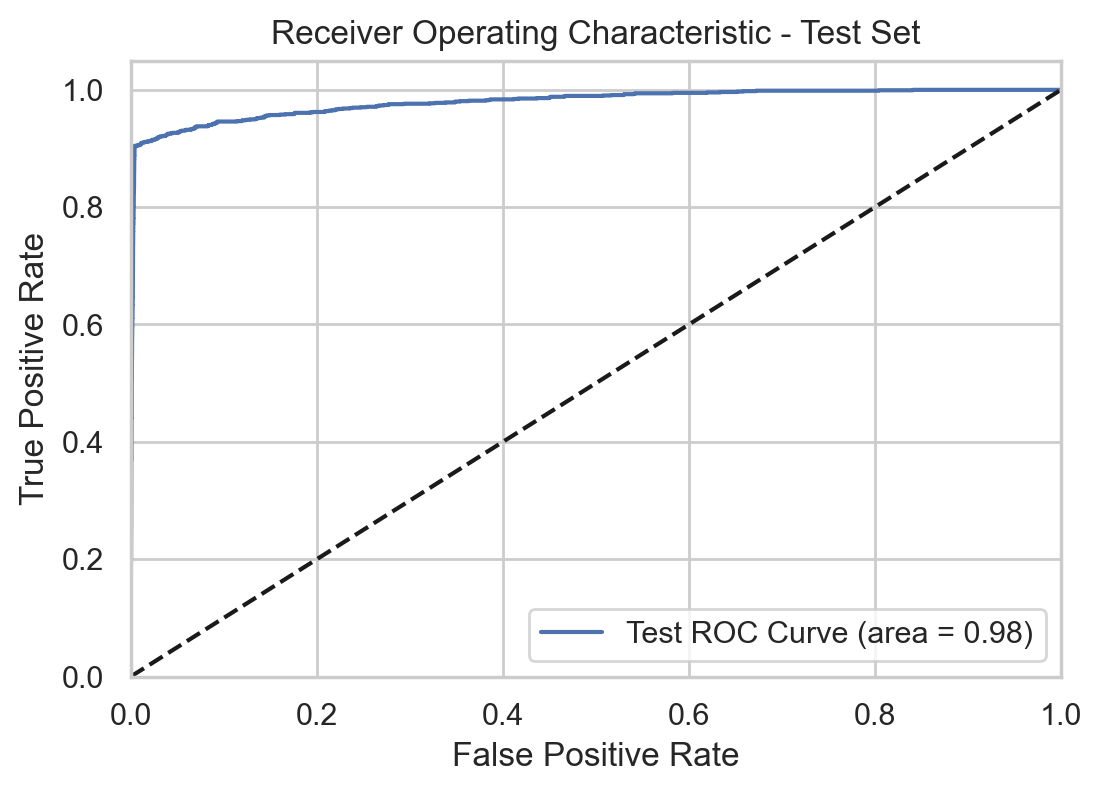

In [29]:
### SMOTE + STEPWISE REGRESSION
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Selected features from stepwise regression
selected_features = ['TIME', 'AGE', 'GENDER', 'DIABETES', 'SYSBP']
X = cvd1[selected_features]
y = cvd1['CVD']

# Split the data into train, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Fit a Logit model using MLE on the SMOTE data
X_train_const_smote = sm.add_constant(X_train_smote)  # Adding a constant for intercept
logit_model = sm.Logit(y_train_smote, X_train_const_smote).fit(method='newton')  # Use MLE method

# Print the Logit summary
print(logit_model.summary())


# Evaluate the model on the validation set
X_val_const = sm.add_constant(X_val)
y_pred_proba_val = logit_model.predict(X_val_const)
y_pred_val = (y_pred_proba_val >= 0.5).astype(int)

# Evaluation metrics for validation set
val_accuracy = accuracy_score(y_val, y_pred_val)
val_precision = precision_score(y_val, y_pred_val)
val_recall = recall_score(y_val, y_pred_val)
val_f1 = f1_score(y_val, y_pred_val)
val_roc_auc = roc_auc_score(y_val, y_pred_proba_val)

# Evaluate the model on the test set
X_test_const = sm.add_constant(X_test)
y_pred_proba_test = logit_model.predict(X_test_const)
y_pred_test = (y_pred_proba_test >= 0.5).astype(int)

# Evaluation metrics for test set
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)
test_roc_auc = roc_auc_score(y_test, y_pred_proba_test)

# Print evaluation metrics
print("Validation Set Metrics:")
print(f"Accuracy: {val_accuracy:.4f}, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, F1 Score: {val_f1:.4f}, ROC AUC: {val_roc_auc:.4f}")
print("Test Set Metrics:")
print(f"Accuracy: {test_accuracy:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1 Score: {test_f1:.4f}, ROC AUC: {test_roc_auc:.4f}")

# Plot ROC curve for test set
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_test)
plt.figure()
plt.plot(fpr, tpr, label=f'Test ROC Curve (area = {test_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Test Set')
plt.legend(loc="lower right")
plt.show()


In [61]:
cvd1.columns

Index(['GENDER', 'AGE', 'BMI', 'SMOKER', 'SYSBP', 'PREVHYP', 'FAMILY_HISTORY',
       'ATR_FIB', 'KIDNEY_DISEASE', 'ATHRITIS', 'DIABETES', 'COPD', 'TIME',
       'CVD'],
      dtype='object')

In [31]:
cvd2 = cvd1.copy()
cvd2.head(1)

GENDER  AGE   BMI  SMOKER  SYSBP  PREVHYP  FAMILY_HISTORY  ATR_FIB  \
0       0   54  25.0       0  161.0        0               1        0   

   KIDNEY_DISEASE  ATHRITIS  DIABETES  COPD  TIME  CVD  
0               0         0         0     0    10    0

In [32]:
#let's drop the TIME

# List of features to remove
features_to_remove = ['TIME']

# Remove the specified features from the DataFrame
cvd2 = cvd2.drop(features_to_remove, axis=1)
cvd2.head(3)

GENDER  AGE   BMI  SMOKER  SYSBP  PREVHYP  FAMILY_HISTORY  ATR_FIB  \
0       0   54  25.0       0  161.0        0               1        0   
1       1   31  25.0       0  121.0        0               0        0   
2       1   50  31.3       0  130.0        0               0        0   

   KIDNEY_DISEASE  ATHRITIS  DIABETES  COPD  CVD  
0               0         0         0     0    0  
1               0         0         0     0    0  
2               0         0         0     0    0

## BASELINE MODEL

Optimization terminated successfully.
         Current function value: 0.195529
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                    CVD   No. Observations:                60000
Model:                          Logit   Df Residuals:                    59987
Method:                           MLE   Df Model:                           12
Date:                Fri, 27 Sep 2024   Pseudo R-squ.:                  0.1955
Time:                        21:09:46   Log-Likelihood:                -11732.
converged:                       True   LL-Null:                       -14582.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -3.4679      0.030   -116.328      0.000      -3.526      -3.409
GENDER           

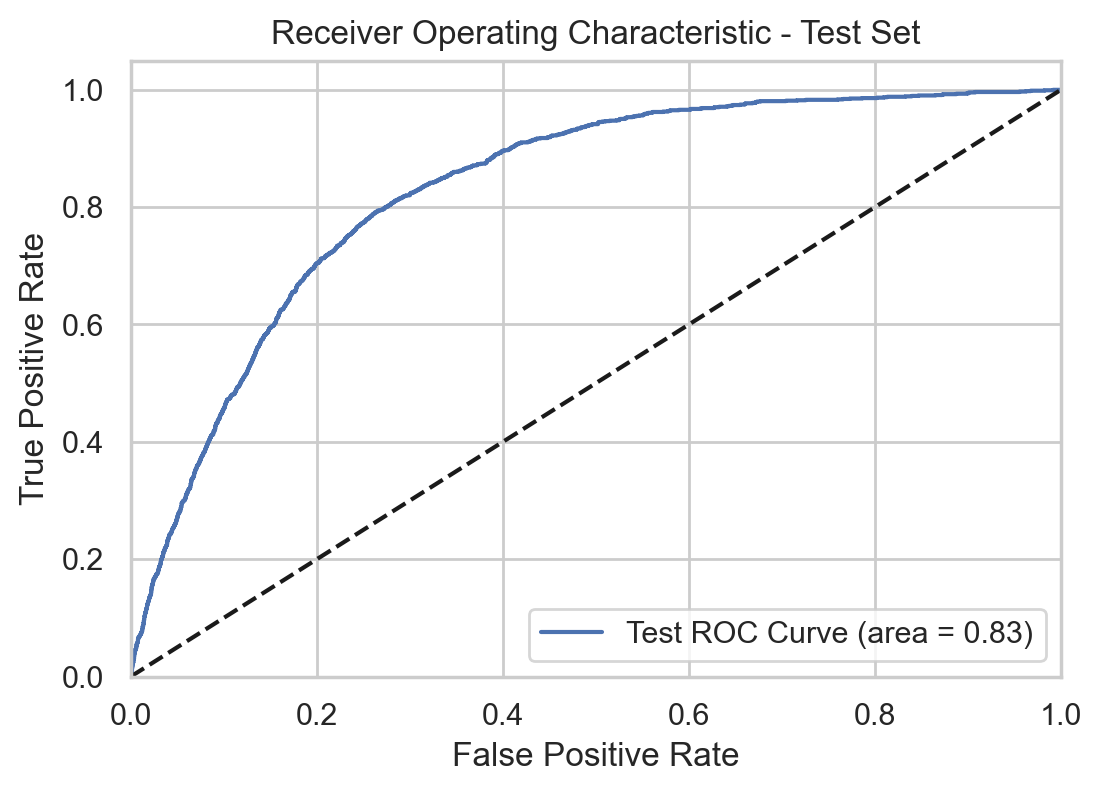

In [34]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd

# Define features and target
X = cvd2.drop('CVD', axis=1)
y = cvd2['CVD']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)  # Retain column names after scaling

# Split data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.15 x 0.9 = 0.2

# Fit a Logistic Regression model using MLE
X_train_const = sm.add_constant(X_train)  # Adding a constant for intercept
model = sm.Logit(y_train, X_train_const).fit()

# Print the model summary
print(model.summary())

# Calculate odds ratios and 95% confidence intervals
odds_ratios = pd.DataFrame({
    'Feature': X_train_const.columns,
    'Odds Ratio': model.params.apply(lambda x: round(np.exp(x), 4)),
    'Lower 95% CI': model.conf_int()[0].apply(lambda x: round(np.exp(x), 4)),
    'Upper 95% CI': model.conf_int()[1].apply(lambda x: round(np.exp(x), 4))
})



# Display odds ratios
print("\nOdds Ratios and 95% Confidence Intervals:")
print(odds_ratios)

# Evaluate the model on the validation set
X_val_const = sm.add_constant(X_val)  # Add constant to validation set
y_pred_proba_val = model.predict(X_val_const)
y_pred_val = (y_pred_proba_val >= 0.5).astype(int)

# Evaluation metrics for validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
precision_val = precision_score(y_val, y_pred_val)
recall_val = recall_score(y_val, y_pred_val)
f1_val = f1_score(y_val, y_pred_val)
roc_auc_val = roc_auc_score(y_val, y_pred_proba_val)

# Evaluate the model on the test set
X_test_const = sm.add_constant(X_test)  # Add constant to test set
y_pred_proba_test = model.predict(X_test_const)
y_pred_test = (y_pred_proba_test >= 0.5).astype(int)

# Evaluation metrics for test set
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
roc_auc_test = roc_auc_score(y_test, y_pred_proba_test)

# Print evaluation metrics
print("Validation Set Metrics:")
print(f"Accuracy: {accuracy_val:.4f}, Precision: {precision_val:.4f}, Recall: {recall_val:.4f}, F1 Score: {f1_val:.4f}, ROC AUC: {roc_auc_val:.4f}")
print("Test Set Metrics:")
print(f"Accuracy: {accuracy_test:.4f}, Precision: {precision_test:.4f}, Recall: {recall_test:.4f}, F1 Score: {f1_test:.4f}, ROC AUC: {roc_auc_test:.4f}")

# Plot ROC curve for test set
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_test)
plt.figure()
plt.plot(fpr, tpr, label=f'Test ROC Curve (area = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Test Set')
plt.legend(loc="lower right")
plt.show()


## SMOTE

Validation Set Metrics:
Accuracy: 0.7292
Precision: 0.1658
Recall: 0.7822
F1 Score: 0.2736
ROC AUC: 0.8288

Test Set Metrics:
Accuracy: 0.7349
Precision: 0.1753
Recall: 0.7898
F1 Score: 0.2869
ROC AUC: 0.8291


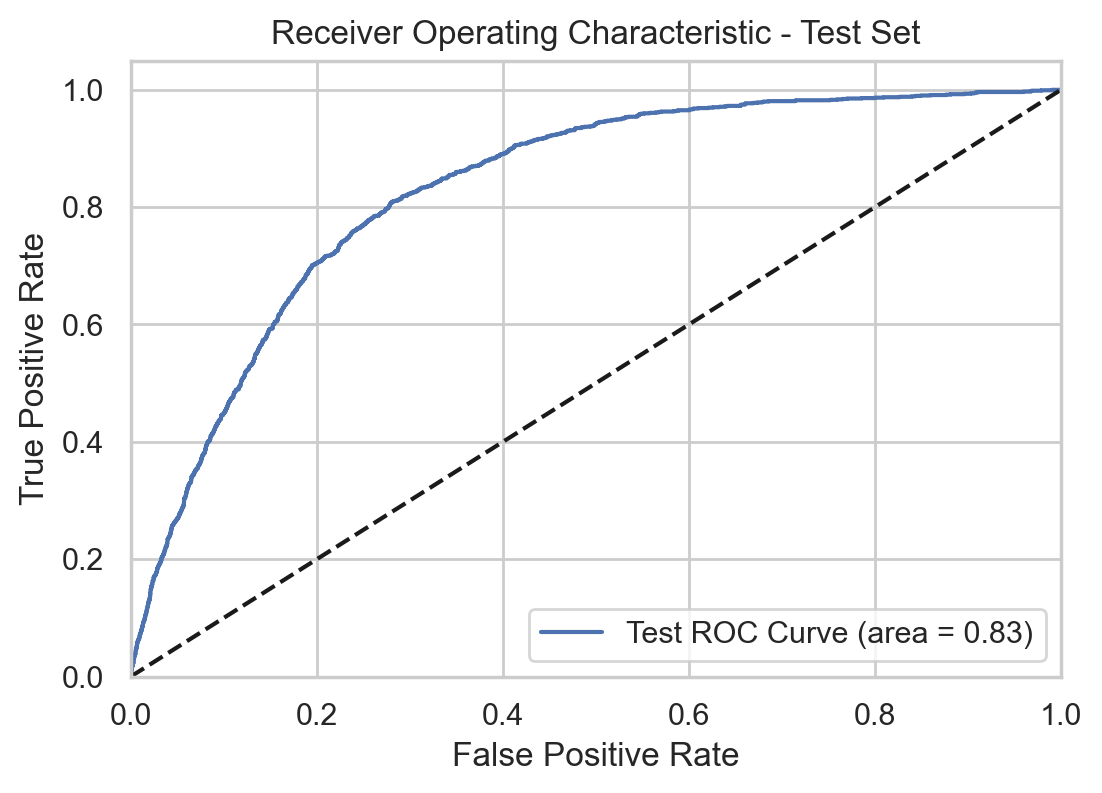

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt


# Separate features and target
X = cvd2.drop('CVD', axis=1)
y = cvd2['CVD']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Split data into train, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train the logistic regression model on the SMOTE data
model = LogisticRegression(random_state=42)
model.fit(X_train_smote, y_train_smote)

# Validation set predictions
y_pred_val = model.predict(X_val)
y_pred_proba_val = model.predict_proba(X_val)[:, 1]

# Test set predictions
y_pred_test = model.predict(X_test)
y_pred_proba_test = model.predict_proba(X_test)[:, 1]

# Evaluation metrics
metrics_val = {
    "Accuracy": accuracy_score(y_val, y_pred_val),
    "Precision": precision_score(y_val, y_pred_val),
    "Recall": recall_score(y_val, y_pred_val),
    "F1 Score": f1_score(y_val, y_pred_val),
    "ROC AUC": roc_auc_score(y_val, y_pred_proba_val)
}

metrics_test = {
    "Accuracy": accuracy_score(y_test, y_pred_test),
    "Precision": precision_score(y_test, y_pred_test),
    "Recall": recall_score(y_test, y_pred_test),
    "F1 Score": f1_score(y_test, y_pred_test),
    "ROC AUC": roc_auc_score(y_test, y_pred_proba_test)
}

# Print evaluation results
print("Validation Set Metrics:")
for key, value in metrics_val.items():
    print(f"{key}: {value:.4f}")

print("\nTest Set Metrics:")
for key, value in metrics_test.items():
    print(f"{key}: {value:.4f}")

# Plot ROC curve for test set
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_test)
plt.figure()
plt.plot(fpr, tpr, label=f'Test ROC Curve (area = {metrics_test["ROC AUC"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Test Set')
plt.legend(loc="lower right")
plt.show()


### STEPWISE REGRESSION

In [37]:
import statsmodels.api as sm

def stepwise_selection(X, y, initial_list=[], threshold_in=0.005, threshold_out=0.01, verbose=True):
    included = list(initial_list)
    while True:
        changed = False
        # Forward step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.Logit(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit(disp=0)
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # Backward step
        model = sm.Logit(y, sm.add_constant(pd.DataFrame(X[included]))).fit(disp=0)
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))

        if not changed:
            break

    return included

# Example usage
X = cvd2.drop('CVD', axis=1)  # feature dataframe
y = cvd2['CVD']               # target variable

select_features = stepwise_selection(X, y)

print('Selected features:', select_features)


Add  KIDNEY_DISEASE                 with p-value 0.0
Add  AGE                            with p-value 0.0
Add  DIABETES                       with p-value 6.75265e-83
Add  GENDER                         with p-value 3.26447e-67
Add  SYSBP                          with p-value 1.82193e-18
Add  ATR_FIB                        with p-value 8.91051e-17
Add  SMOKER                         with p-value 3.67737e-13
Add  PREVHYP                        with p-value 1.38951e-12
Add  FAMILY_HISTORY                 with p-value 2.86685e-10
Selected features: ['KIDNEY_DISEASE', 'AGE', 'DIABETES', 'GENDER', 'SYSBP', 'ATR_FIB', 'SMOKER', 'PREVHYP', 'FAMILY_HISTORY']


Add  KIDNEY_DISEASE                 with p-value 0.0
Add  AGE                            with p-value 0.0
Add  DIABETES                       with p-value 6.75265e-83
Add  GENDER                         with p-value 3.26447e-67
Add  SYSBP                          with p-value 1.82193e-18
Add  ATR_FIB                        with p-value 8.91051e-17
Add  SMOKER                         with p-value 3.67737e-13
Add  PREVHYP                        with p-value 1.38951e-12
Add  FAMILY_HISTORY                 with p-value 2.86685e-10
Selected features: ['KIDNEY_DISEASE', 'AGE', 'DIABETES', 'GENDER', 'SYSBP', 'ATR_FIB', 'SMOKER', 'PREVHYP', 'FAMILY_HISTORY']
Optimization terminated successfully.
         Current function value: 0.195553
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                    CVD   No. Observations:                60000
Model:                          Logit   Df Residuals:                    59990
Me

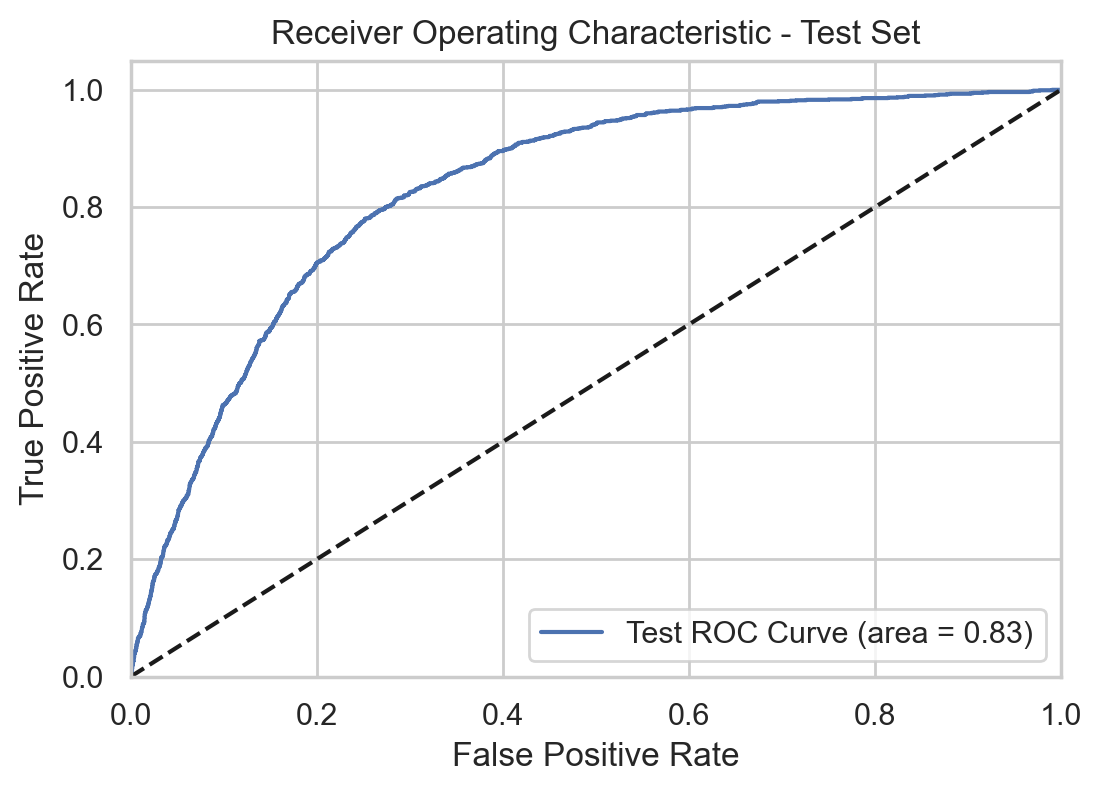

In [38]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Selected features from stepwise regression process
selected_features = stepwise_selection(X, y)

print('Selected features:', select_features)

# Define the dataset using selected features
X = cvd2[select_features]
y = cvd2['CVD']

# Split the data into train, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Add a constant (intercept) to the features
X_train_const = sm.add_constant(X_train)
X_val_const = sm.add_constant(X_val)
X_test_const = sm.add_constant(X_test)

# Fit a logistic regression model using MLE (Maximum Likelihood Estimation)
logit_model = sm.Logit(y_train, X_train_const).fit(method='newton')  # Using Newton-Raphson method for MLE

# Print the model summary
print(logit_model.summary())


# Evaluate the model on the validation set
y_pred_proba_val = logit_model.predict(X_val_const)
y_pred_val = (y_pred_proba_val >= 0.5).astype(int)

# Evaluation metrics for validation set
val_accuracy = accuracy_score(y_val, y_pred_val)
val_precision = precision_score(y_val, y_pred_val)
val_recall = recall_score(y_val, y_pred_val)
val_f1 = f1_score(y_val, y_pred_val)
val_roc_auc = roc_auc_score(y_val, y_pred_proba_val)

# Evaluate the model on the test set
y_pred_proba_test = logit_model.predict(X_test_const)
y_pred_test = (y_pred_proba_test >= 0.5).astype(int)

# Evaluation metrics for test set
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)
test_roc_auc = roc_auc_score(y_test, y_pred_proba_test)

# Print evaluation metrics
print("Validation Set Metrics:")
print(f"Accuracy: {val_accuracy:.4f}, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, F1 Score: {val_f1:.4f}, ROC AUC: {val_roc_auc:.4f}")
print("Test Set Metrics:")
print(f"Accuracy: {test_accuracy:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1 Score: {test_f1:.4f}, ROC AUC: {test_roc_auc:.4f}")

# Plot ROC curve for test set
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_test)
plt.figure()
plt.plot(fpr, tpr, label=f'Test ROC Curve (area = {test_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Test Set')
plt.legend(loc="lower right")
plt.show()


### SMOTE + STEPWISE REGRESSION


Optimization terminated successfully.
         Current function value: 0.499917
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    CVD   No. Observations:               112086
Model:                          Logit   Df Residuals:                   112076
Method:                           MLE   Df Model:                            9
Date:                Fri, 27 Sep 2024   Pseudo R-squ.:                  0.2788
Time:                        21:41:45   Log-Likelihood:                -56034.
converged:                       True   LL-Null:                       -77692.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -5.4806      0.063    -87.674      0.000      -5.603      -5.358
KIDNEY_DISEASE   

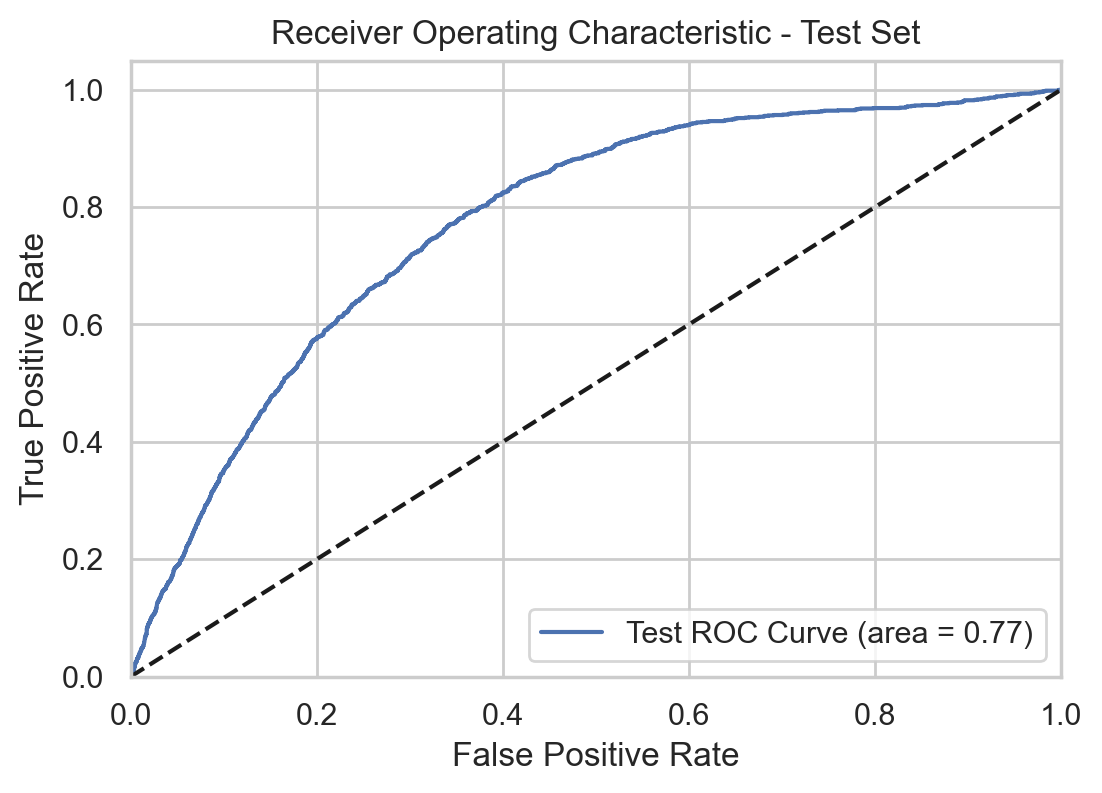

In [39]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Selected features from stepwise regression
selected_features = ['KIDNEY_DISEASE', 'AGE', 'DIABETES', 'GENDER', 'SYSBP', 'ATR_FIB', 'SMOKER', 'PREVHYP', 'FAMILY_HISTORY']
X = cvd2[select_features]
y = cvd2['CVD']

# Split the data into train, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Fit a Logit model using MLE on the SMOTE data
X_train_const_smote = sm.add_constant(X_train_smote)  # Adding a constant for intercept
logit_model = sm.Logit(y_train_smote, X_train_const_smote).fit(method='newton')  # Use MLE method

# Print the Logit summary
print(logit_model.summary())


# Evaluate the model on the validation set
X_val_const = sm.add_constant(X_val)
y_pred_proba_val = logit_model.predict(X_val_const)
y_pred_val = (y_pred_proba_val >= 0.5).astype(int)

# Evaluation metrics for validation set
val_accuracy = accuracy_score(y_val, y_pred_val)
val_precision = precision_score(y_val, y_pred_val)
val_recall = recall_score(y_val, y_pred_val)
val_f1 = f1_score(y_val, y_pred_val)
val_roc_auc = roc_auc_score(y_val, y_pred_proba_val)

# Evaluate the model on the test set
X_test_const = sm.add_constant(X_test)
y_pred_proba_test = logit_model.predict(X_test_const)
y_pred_test = (y_pred_proba_test >= 0.5).astype(int)

# Evaluation metrics for test set
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)
test_roc_auc = roc_auc_score(y_test, y_pred_proba_test)

# Print evaluation metrics
print("Validation Set Metrics:")
print(f"Accuracy: {val_accuracy:.4f}, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, F1 Score: {val_f1:.4f}, ROC AUC: {val_roc_auc:.4f}")
print("Test Set Metrics:")
print(f"Accuracy: {test_accuracy:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1 Score: {test_f1:.4f}, ROC AUC: {test_roc_auc:.4f}")

# Plot ROC curve for test set
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_test)
plt.figure()
plt.plot(fpr, tpr, label=f'Test ROC Curve (area = {test_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Test Set')
plt.legend(loc="lower right")
plt.show()


### COMPLEX ALGORITHM: KNN, DECISION TREE AND RANDOM FOREST

In [63]:
cvd1.head(3)

GENDER  AGE   BMI  SMOKER  SYSBP  PREVHYP  FAMILY_HISTORY  ATR_FIB  \
0       0   54  25.0       0  161.0        0               1        0   
1       1   31  25.0       0  121.0        0               0        0   
2       1   50  31.3       0  130.0        0               0        0   

   KIDNEY_DISEASE  ATHRITIS  DIABETES  COPD  TIME  CVD  
0               0         0         0     0    10    0  
1               0         0         0     0    10    0  
2               0         0         0     0    10    0

In [71]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd


# Define the features and target
features = ['GENDER', 'AGE', 'BMI', 'SMOKER', 'SYSBP', 'PREVHYP', 'FAMILY_HISTORY',
       'ATR_FIB', 'KIDNEY_DISEASE', 'ATHRITIS', 'DIABETES', 'COPD',
       ]
target = 'CVD'

# Select features and target from the dataframe
X = cvd1[features]
y = cvd1[target]

# One-hot encoding for categorical variables
categorical_features = ['GENDER', 'SMOKER', 'DIABETES', 'FAMILY_HISTORY', 'PREVHYP', 'KIDNEY_DISEASE','COPD','ATHRITIS', 'ATR_FIB']
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train, validation, and test sets (60% train, 20% val, 20% test)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define models
knn = KNeighborsClassifier(n_neighbors=5)
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
logistic_regression = LogisticRegression(random_state=42, max_iter=1000)

# Ensemble model using voting
ensemble = VotingClassifier(estimators=[
    ('knn', knn),
    ('dt', decision_tree),
    ('rf', random_forest),
    ('lr', logistic_regression)
], voting='soft')

# List of models to evaluate
models = {
    'KNN': knn,
    'Decision Tree': decision_tree,
    'Random Forest': random_forest,
    'Logistic Regression': logistic_regression,  # Added Logistic Regression as a standalone model
    'Ensemble': ensemble
}

# Dictionary to store evaluation metrics
evaluation_results = {}

# Fit and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    # Validation set predictions
    y_pred_val = model.predict(X_val)
    y_pred_proba_val = model.predict_proba(X_val)[:, 1]
    
    # Test set predictions
    y_pred_test = model.predict(X_test)
    y_pred_proba_test = model.predict_proba(X_test)[:, 1]
    
    # Evaluation metrics for validation set
    metrics_val = {
        "Accuracy": accuracy_score(y_val, y_pred_val),
        "Precision": precision_score(y_val, y_pred_val),
        "Recall": recall_score(y_val, y_pred_val),
        "F1 Score": f1_score(y_val, y_pred_val),
        "ROC AUC": roc_auc_score(y_val, y_pred_proba_val)
    }
    
    # Evaluation metrics for test set
    metrics_test = {
        "Accuracy": accuracy_score(y_test, y_pred_test),
        "Precision": precision_score(y_test, y_pred_test),
        "Recall": recall_score(y_test, y_pred_test),
        "F1 Score": f1_score(y_test, y_pred_test),
        "ROC AUC": roc_auc_score(y_test, y_pred_proba_test)
    }
    
    evaluation_results[model_name] = {
        'Validation': metrics_val,
        'Test': metrics_test
    }

# Print evaluation results
for model_name, metrics in evaluation_results.items():
    print(f"\nModel: {model_name}")
    print("Validation Set Metrics:")
    for key, value in metrics['Validation'].items():
        print(f"{key}: {value:.4f}")
    print("Test Set Metrics:")
    for key, value in metrics['Test'].items():
        print(f"{key}: {value:.4f}")



Model: KNN
Validation Set Metrics:
Accuracy: 0.9248
Precision: 0.2528
Recall: 0.0496
F1 Score: 0.0829
ROC AUC: 0.6753
Test Set Metrics:
Accuracy: 0.9256
Precision: 0.2556
Recall: 0.0509
F1 Score: 0.0849
ROC AUC: 0.6694

Model: Decision Tree
Validation Set Metrics:
Accuracy: 0.8844
Precision: 0.1801
Recall: 0.1933
F1 Score: 0.1865
ROC AUC: 0.5641
Test Set Metrics:
Accuracy: 0.8858
Precision: 0.1834
Recall: 0.1985
F1 Score: 0.1906
ROC AUC: 0.5673

Model: Random Forest
Validation Set Metrics:
Accuracy: 0.9272
Precision: 0.3023
Recall: 0.0474
F1 Score: 0.0820
ROC AUC: 0.7807
Test Set Metrics:
Accuracy: 0.9280
Precision: 0.3128
Recall: 0.0524
F1 Score: 0.0898
ROC AUC: 0.7867

Model: Logistic Regression
Validation Set Metrics:
Accuracy: 0.9315
Precision: 0.5312
Recall: 0.0124
F1 Score: 0.0242
ROC AUC: 0.8270
Test Set Metrics:
Accuracy: 0.9320
Precision: 0.4194
Recall: 0.0096
F1 Score: 0.0188
ROC AUC: 0.8362

Model: Ensemble
Validation Set Metrics:
Accuracy: 0.9247
Precision: 0.2624
Recall: 

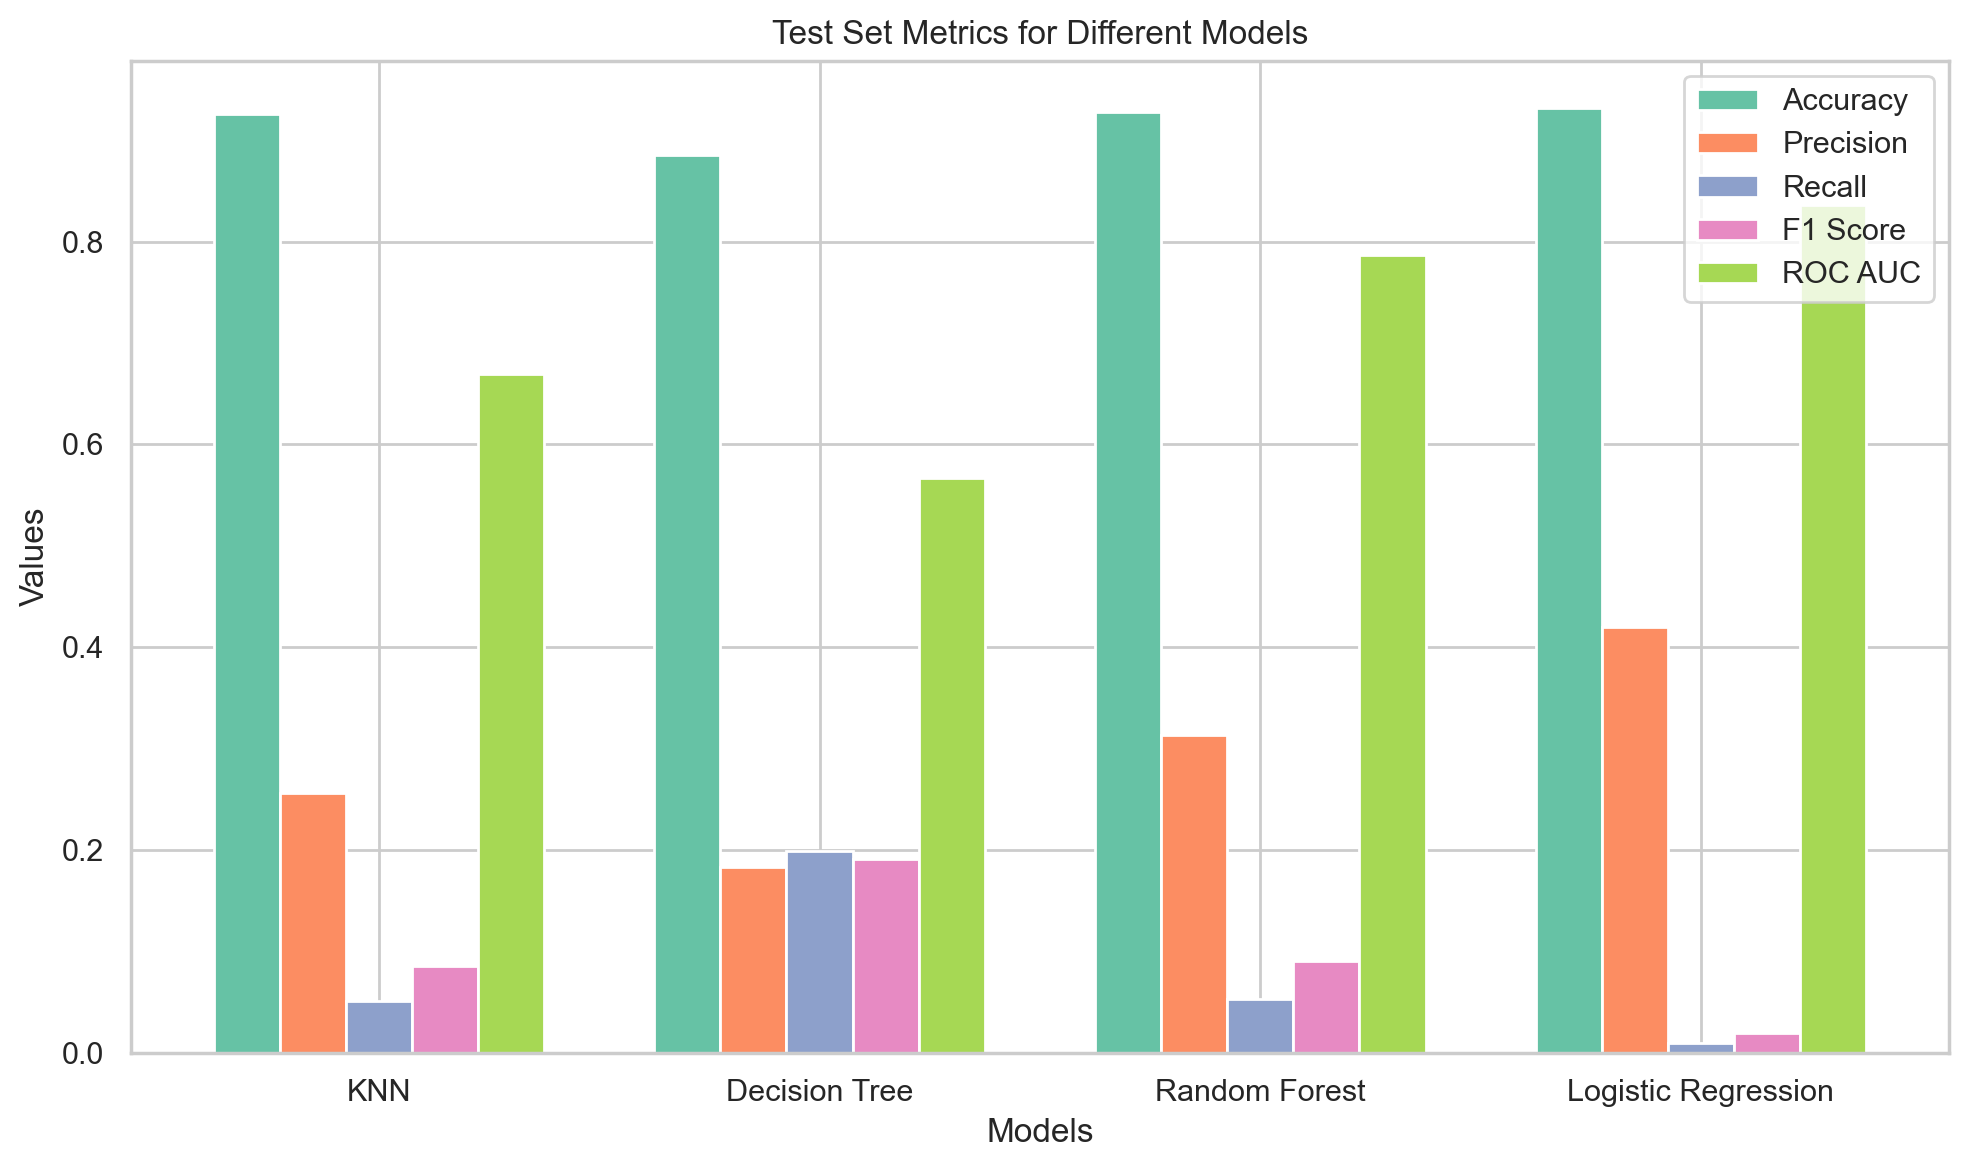

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Test set metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
models = ['KNN', 'Decision Tree', 'Random Forest', 'Logistic Regression']

# Corresponding test set metrics for each model
knn_metrics = [0.9256, 0.2556, 0.0509, 0.0849, 0.6694]
decision_tree_metrics = [0.8858, 0.1834, 0.1985, 0.1906, 0.5673]
random_forest_metrics = [0.9280, 0.3128, 0.0524, 0.0898, 0.7867]
logistic_regression_metrics = [0.9320, 0.4194, 0.0096, 0.0188, 0.8362]

# Set the position of the bars on the x-axis
x = np.arange(len(models))

# Set colors for the metrics
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854']

# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Width of the bars
bar_width = 0.15

# Plot the bars for each metric
ax.bar(x - bar_width * 2, [m[0] for m in [knn_metrics, decision_tree_metrics, random_forest_metrics, logistic_regression_metrics]], bar_width, label='Accuracy', color=colors[0])
ax.bar(x - bar_width, [m[1] for m in [knn_metrics, decision_tree_metrics, random_forest_metrics, logistic_regression_metrics]], bar_width, label='Precision', color=colors[1])
ax.bar(x, [m[2] for m in [knn_metrics, decision_tree_metrics, random_forest_metrics, logistic_regression_metrics]], bar_width, label='Recall', color=colors[2])
ax.bar(x + bar_width, [m[3] for m in [knn_metrics, decision_tree_metrics, random_forest_metrics, logistic_regression_metrics]], bar_width, label='F1 Score', color=colors[3])
ax.bar(x + bar_width * 2, [m[4] for m in [knn_metrics, decision_tree_metrics, random_forest_metrics, logistic_regression_metrics]], bar_width, label='ROC AUC', color=colors[4])

# Add labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Values')
ax.set_title('Test Set Metrics for Different Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Show the chart
plt.tight_layout()
plt.show()


In [73]:
cvd1.columns

Index(['GENDER', 'AGE', 'BMI', 'SMOKER', 'SYSBP', 'PREVHYP', 'FAMILY_HISTORY',
       'ATR_FIB', 'KIDNEY_DISEASE', 'ATHRITIS', 'DIABETES', 'COPD', 'TIME',
       'CVD'],
      dtype='object')

In [77]:
pip install lifelines


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/349.3 kB ? eta -:--:--
   ---------------- ----------------------- 143.4/349.3 kB 4.3 MB/s eta 0:00:01
   ---------------------------------------- 349.3/349.3 kB 4.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/52.5 kB ? eta -:--:--
   ---------------------------------------- 52.5/52.5 kB 2.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/94.5 kB ? eta -:--:--
   ---------------------------------------- 94.5/94.5 kB 5.3 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=7fd219e6ecbea0fb1bf38695cf33153abae6b48df0268573c8ab4bc7add8499b
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\8b\67\f4\2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma
Note: you may need to restart the kernel to 

                    coef  exp(coef)  se(coef)  coef lower 95%  coef upper 95%  \
covariate                                                                       
GENDER          0.423636   1.527506  0.025536        0.373587        0.473685   
AGE             0.071658   1.074288  0.001199        0.069308        0.074008   
BMI            -0.003258   0.996748  0.002944       -0.009028        0.002512   
SMOKER          0.322363   1.380386  0.044481        0.235182        0.409545   
SYSBP           0.006857   1.006881  0.000709        0.005468        0.008246   
PREVHYP         0.271321   1.311697  0.038198        0.196455        0.346188   
FAMILY_HISTORY  0.198687   1.219800  0.031244        0.137449        0.259924   
ATR_FIB         0.494725   1.640046  0.058901        0.379281        0.610168   
KIDNEY_DISEASE  0.127094   1.135524  0.030432        0.067448        0.186740   
ATHRITIS        0.127187   1.135629  0.087259       -0.043838        0.298212   
DIABETES        0.557218   1

<Axes: xlabel='log(HR) (95% CI)'>

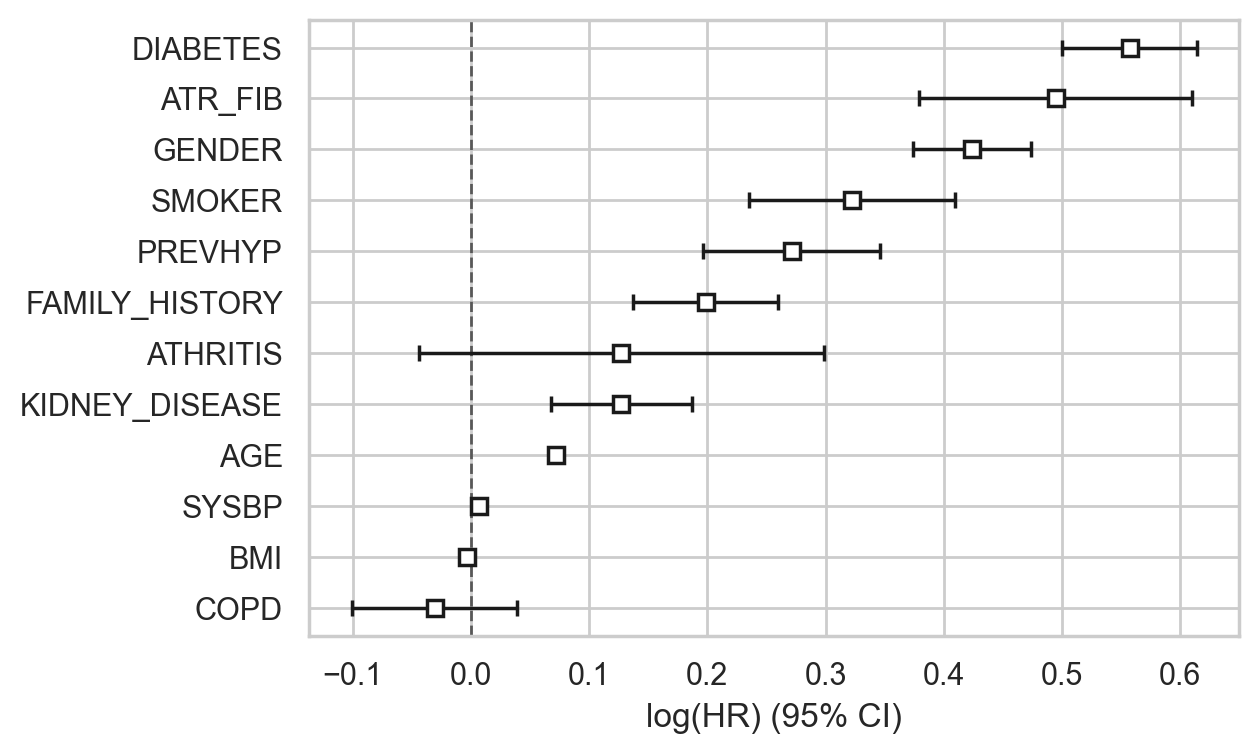

In [79]:
import pandas as pd
from lifelines import CoxPHFitter

# Load the dataset
# Assuming 'cvd1' is already loaded and is a Pandas DataFrame
# Here are the features:
features = ['GENDER', 'AGE', 'BMI', 'SMOKER', 'SYSBP', 'PREVHYP', 'FAMILY_HISTORY',
            'ATR_FIB', 'KIDNEY_DISEASE', 'ATHRITIS', 'DIABETES', 'COPD']
time_column = 'TIME'
event_column = 'CVD'

# Prepare the dataset for the Cox model
cox_data = cvd1[features + [time_column, event_column]]

# Fit the Cox proportional hazards model
cox_model = CoxPHFitter()
cox_model.fit(cox_data, duration_col=time_column, event_col=event_column)

# Summary of the model
print(cox_model.summary)

# Plot the coefficients
cox_model.plot()


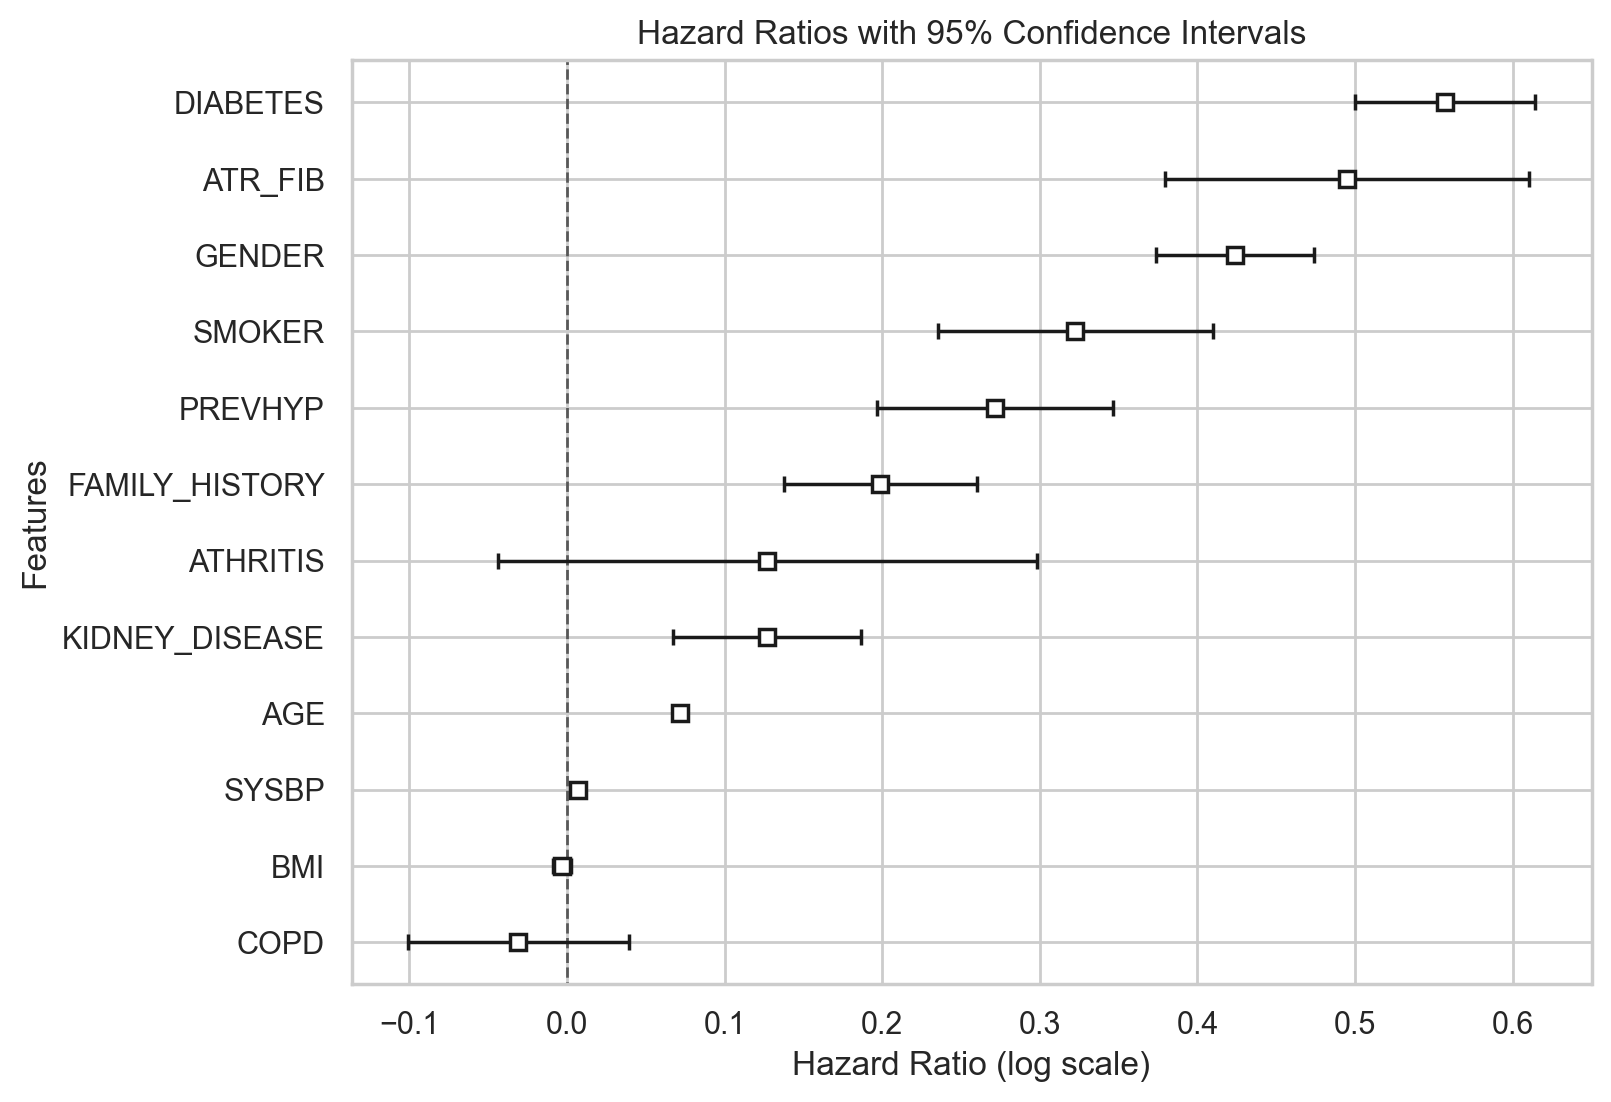

In [83]:
import pandas as pd
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt

# Assuming `cox_model` is your fitted CoxPHFitter object from the lifelines package
# Plot the hazard ratios (exp(coef)) with 95% confidence intervals

# Create a plot for hazard ratios
fig, ax = plt.subplots(figsize=(8, 6))
cox_model.plot(ax=ax)

# Set plot title and labels
plt.title('Hazard Ratios with 95% Confidence Intervals')
plt.xlabel('Hazard Ratio (log scale)')
plt.ylabel('Features')

# Show the plot
plt.show()


Index(['GENDER', 'AGE', 'BMI', 'SMOKER', 'SYSBP', 'PREVHYP', 'FAMILY_HISTORY',
       'ATR_FIB', 'KIDNEY_DISEASE', 'ATHRITIS', 'DIABETES', 'COPD', 'TIME',
       'CVD'],
      dtype='object')
Selected features: ['AGE', 'DIABETES', 'GENDER', 'SYSBP', 'ATR_FIB', 'PREVHYP', 'SMOKER', 'FAMILY_HISTORY', 'KIDNEY_DISEASE', 'BMI']
                    coef  exp(coef)  se(coef)  coef lower 95%  coef upper 95%  \
covariate                                                                       
AGE             0.072348   1.075030  0.001336        0.069730        0.074967   
DIABETES        0.559085   1.749071  0.032536        0.495316        0.622854   
GENDER          0.414880   1.514189  0.028413        0.359192        0.470569   
SYSBP           0.006815   1.006838  0.000797        0.005253        0.008377   
ATR_FIB         0.509478   1.664422  0.066718        0.378713        0.640244   
PREVHYP         0.304170   1.355500  0.042120        0.221616        0.386725   
SMOKER          0.320382   

<Axes: xlabel='log(HR) (95% CI)'>

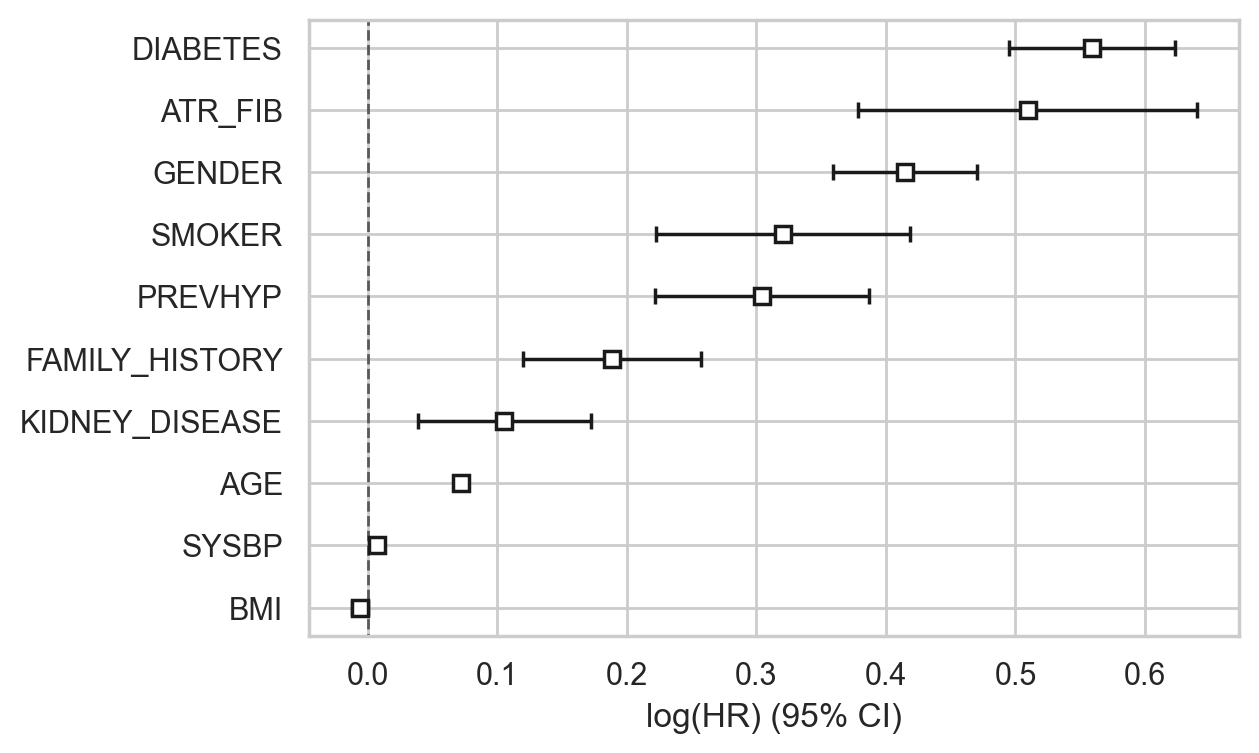

In [89]:
# Display column names to confirm correct naming
print(cvd1.columns)

# After confirming the correct column names, replace 'TIME' if needed
# Assuming 'TIME' is indeed the correct column, let's proceed with the code:

import pandas as pd
from lifelines import CoxPHFitter
from sklearn.model_selection import train_test_split

# Assuming your data is in a DataFrame called `cvd1`
# Ensure the relevant columns are selected
features = ['GENDER', 'AGE', 'BMI', 'SMOKER', 'SYSBP', 'PREVHYP', 
            'FAMILY_HISTORY', 'ATR_FIB', 'KIDNEY_DISEASE', 
            'ATHRITIS', 'DIABETES', 'COPD', 'TIME', 'CVD']

cvd1 = cvd1[features]

# Split the data into train and test sets
train_data, test_data = train_test_split(cvd1, test_size=0.2, random_state=42)

# Define a function for stepwise regression
def stepwise_selection(data, duration_col, event_col, predictors, direction='both'):
    initial_features = []
    best_features = []
    remaining_features = list(predictors)
    
    cph = CoxPHFitter()
    best_aic = float('inf')

    while remaining_features and direction in ['both', 'forward']:
        aic_with_candidates = []
        for candidate in remaining_features:
            selected_features = best_features + [candidate]
            cph.fit(data[selected_features + [duration_col, event_col]], duration_col=duration_col, event_col=event_col)
            aic = cph.AIC_partial_
            aic_with_candidates.append((aic, candidate))

        aic_with_candidates.sort()
        best_new_aic, best_new_feature = aic_with_candidates[0]

        if best_new_aic < best_aic:
            best_aic = best_new_aic
            best_features.append(best_new_feature)
            remaining_features.remove(best_new_feature)
        else:
            break

    while best_features and direction in ['both', 'backward']:
        aic_with_candidates = []
        for candidate in best_features:
            selected_features = [feature for feature in best_features if feature != candidate]
            cph.fit(data[selected_features + [duration_col, event_col]], duration_col=duration_col, event_col=event_col)
            aic = cph.AIC_partial_
            aic_with_candidates.append((aic, candidate))

        aic_with_candidates.sort(reverse=True)
        best_new_aic, worst_feature = aic_with_candidates[0]

        if best_new_aic < best_aic:
            best_aic = best_new_aic
            best_features.remove(worst_feature)
        else:
            break

    return best_features

# List of predictor variables
predictors = ['GENDER', 'AGE', 'BMI', 'SMOKER', 'SYSBP', 'PREVHYP', 
              'FAMILY_HISTORY', 'ATR_FIB', 'KIDNEY_DISEASE', 
              'ATHRITIS', 'DIABETES', 'COPD']

# Perform stepwise selection
selected_features = stepwise_selection(train_data, duration_col='TIME', event_col='CVD', predictors=predictors, direction='both')

print("Selected features:", selected_features)

# Fit the final model with selected features
cph = CoxPHFitter()
cph.fit(train_data[selected_features + ['TIME', 'CVD']], duration_col='TIME', event_col='CVD')
print(cph.summary)

# Evaluate on the test set
cph.plot()


In [87]:
cvd1.columns

Index(['GENDER', 'AGE', 'BMI', 'SMOKER', 'SYSBP', 'PREVHYP', 'FAMILY_HISTORY',
       'ATR_FIB', 'KIDNEY_DISEASE', 'ATHRITIS', 'DIABETES', 'COPD', 'TIME',
       'CVD'],
      dtype='object')

In [ ]:
cvd1['TIME'].des

In [91]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from lifelines import CoxPHFitter
from lifelines.utils import concordance_index

# Load your dataset (assuming 'cvd1' is your DataFrame)
# cvd1 = pd.read_csv('path_to_your_data.csv')

# Define your features and target variable
features = ['AGE', 'DIABETES', 'GENDER', 'SYSBP', 'ATR_FIB', 'PREVHYP', 
            'SMOKER', 'FAMILY_HISTORY', 'KIDNEY_DISEASE', 'BMI']
target = ['TIME', 'CVD']

# Create the Cox proportional hazards model
cph = CoxPHFitter()

# Use K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
c_index_scores = []

for train_index, test_index in kf.split(cvd1):
    train_data = cvd1.iloc[train_index]
    test_data = cvd1.iloc[test_index]
    
    cph.fit(train_data[features + target], duration_col='TIME', event_col='CVD')
    
    # Calculate concordance index for the test set
    c_index = concordance_index(test_data['TIME'], -cph.predict_partial_hazard(test_data[features]), test_data['CVD'])
    c_index_scores.append(c_index)

# Calculate average concordance index across all folds
average_c_index = sum(c_index_scores) / len(c_index_scores)
print(f"Average Concordance Index: {average_c_index}")


Average Concordance Index: 0.8206935425661614


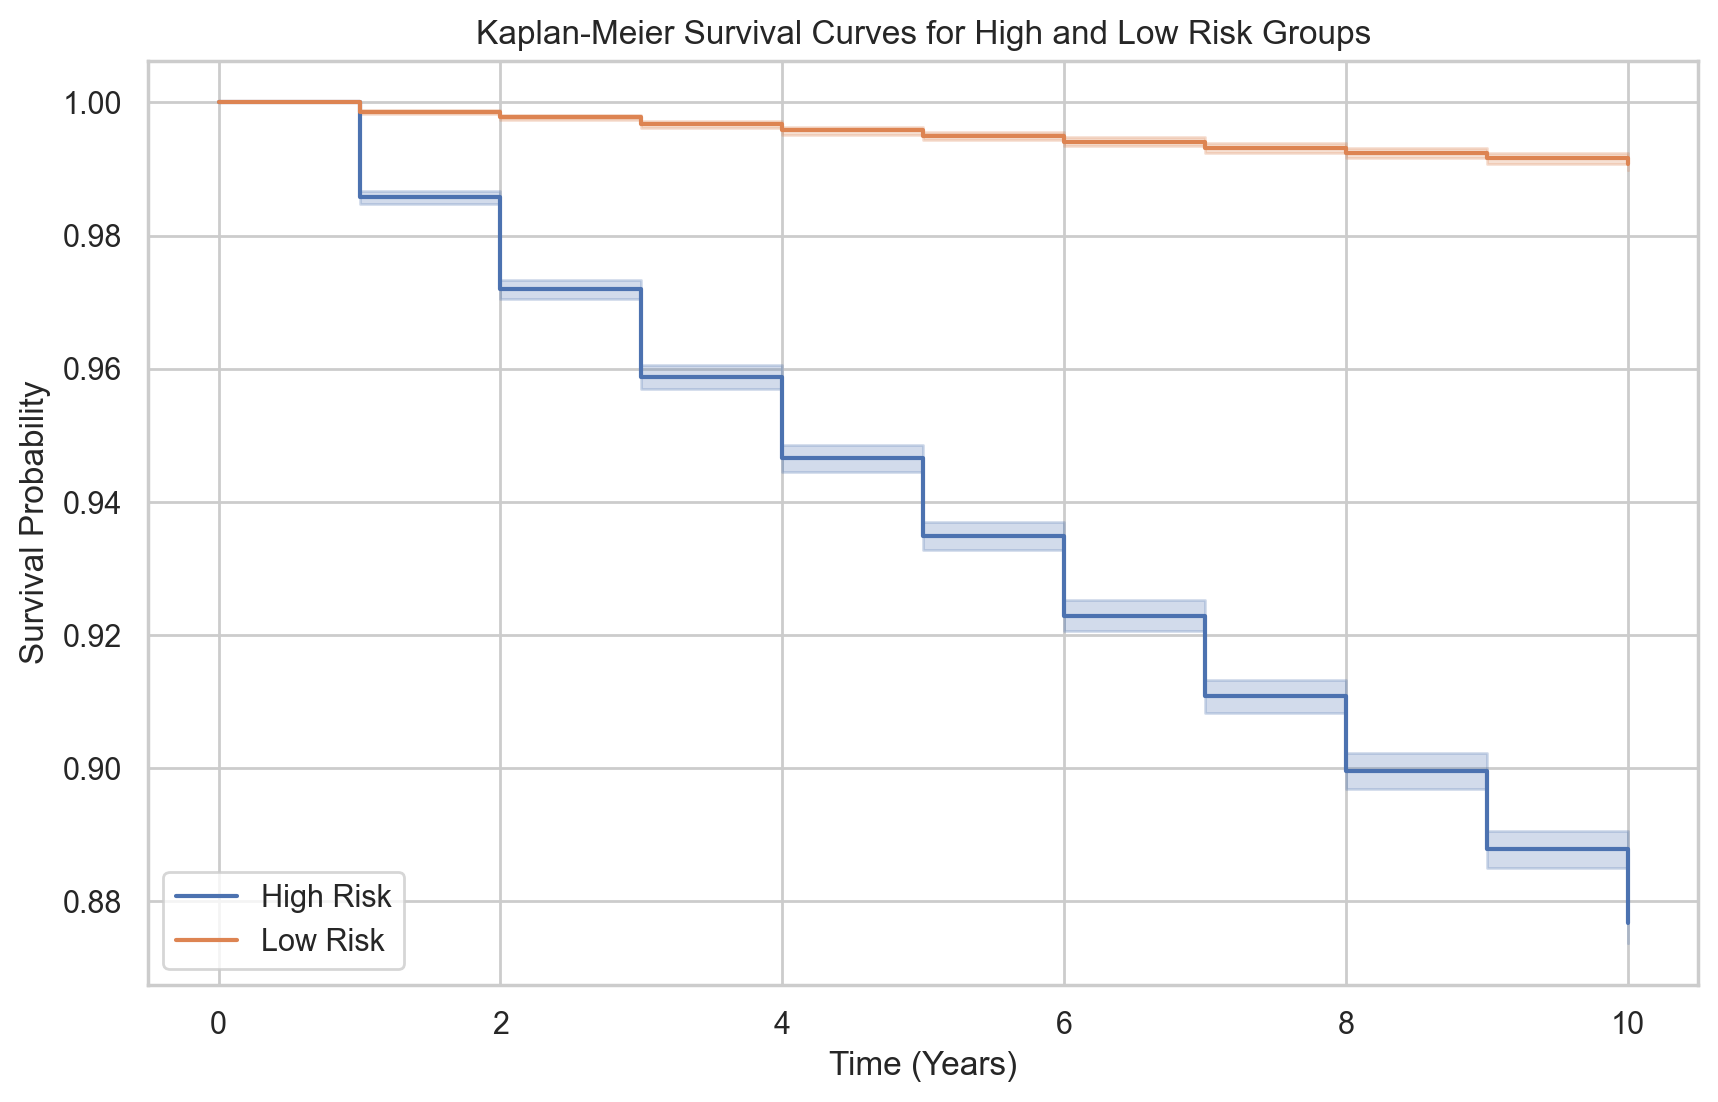

In [93]:
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# Use the median risk score to split data into high and low-risk groups
median_risk_score = cph.predict_partial_hazard(cvd1[features]).median()
cvd1['RiskGroup'] = (cph.predict_partial_hazard(cvd1[features]) > median_risk_score).astype(int)

# Kaplan-Meier fitting
kmf_high_risk = KaplanMeierFitter()
kmf_low_risk = KaplanMeierFitter()

# Fit the model to the high-risk group
high_risk_group = cvd1[cvd1['RiskGroup'] == 1]
kmf_high_risk.fit(durations=high_risk_group['TIME'], event_observed=high_risk_group['CVD'], label='High Risk')

# Fit the model to the low-risk group
low_risk_group = cvd1[cvd1['RiskGroup'] == 0]
kmf_low_risk.fit(durations=low_risk_group['TIME'], event_observed=low_risk_group['CVD'], label='Low Risk')

# Plot the survival curves
plt.figure(figsize=(10, 6))
kmf_high_risk.plot_survival_function()
kmf_low_risk.plot_survival_function()
plt.title('Kaplan-Meier Survival Curves for High and Low Risk Groups')
plt.xlabel('Time (Years)')
plt.ylabel('Survival Probability')
plt.show()


In [97]:
from lifelines import CoxPHFitter

# Assuming 'cvd1' was used to fit the model
# Fit the model on the cvd1 dataset
cph = CoxPHFitter()
cph.fit(cvd1, duration_col='TIME', event_col='CVD')

# Check proportional hazards assumption using the same dataset
cph.check_assumptions(cvd1, p_value_threshold=0.05)


The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 100000 total observations, 93388 right-censored observations>
         test_name = proportional_hazard_test

---
                     test_statistic    p  -log2(p)
AGE            km              1.01 0.31      1.67
               rank            1.06 0.30      1.72
ATHRITIS       km              3.02 0.08      3.61
               rank            2.95 0.09      3.54
ATR_FIB        km              0.65 0.42      1.25
               rank            0.73 0.39      1.35
BMI            km              4.34 0.04      4.75
               rank            3.63 0.06      4.14
COPD           km              0.16 0.69      0.54
               rank            0.23 0.63      0.66
DIABETES       km              4.02 0.04      4.48
               rank            4.42 0.04      4.82
FAMILY_HISTORY km              1.95 0.16      2.62
               rank            2.11 0.15      2.77
GENDER         km              0.85 0.36      1.49
               rank            0.94 0.33      1.59
KIDNEY_DISEASE km              0.16 0.69      0.54
               rank            0.19 0.66      0.60
PREVHYP        km              0.15 0.70      0.52
               rank            0.37 0.54      0.88
RiskGroup      km              0.79 0.37      1.42
               rank            1.09 0.30      1.75
SMOKER         km              0.06 0.81      0.31
               rank            0.05 0.82      0.28
SYSBP          km              1.22 0.27      1.89
               rank            1.22 0.27      1.90



1. Variable 'BMI' failed the non-proportional test: p-value is 0.0372.

   Advice 1: the functional form of the variable 'BMI' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'BMI' using pd.cut, and then specify it in `strata=['BMI',
...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


2. Variable 'DIABETES' failed the non-proportional test: p-value is 0.0355.

   Advice: with so few unique values (only 2), you can include `strata=['DIABETES', ...]` in the
call in `.fit`. See documentation in link [E] below.

---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.i

[]